## Import Python Libraries

In [608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

## Load the dataset in the csv file into data

In [393]:
data = pd.read_csv('Credit card.csv')
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

## Convert the data into DataFrame

In [394]:
df = pd.DataFrame(data)
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

## Display total number of rows and columns in the DataFrame

In [395]:
df.shape

(30000, 25)

## Display total number of Elements in the DataFrame

In [396]:
df.size

750000

## Series of labels that identify each row.

In [397]:
df.index

RangeIndex(start=0, stop=30000, step=1)

## List the columns in the DataFrame

In [398]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Provides information about the DataFrame

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Descriptive Analysis
### Provides Statistical measures for the numerical columns

In [400]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

## Data Cleaning
### Check for total number of null values
- A missing or unknown value

In [401]:
df.isnull()

ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
0      False      False  False      False     False  False  False  False   
1      False      False  False      False     False  False  False  False   
2      False      False  False      False     False  False  False  False   
3      False      False  False      False     False  False  False  False   
4      False      False  False      False     False  False  False  False   
...      ...        ...    ...        ...       ...    ...    ...    ...   
29995  False      False  False      False     False  False  False  False   
29996  False      False  False      False     False  False  False  False   
29997  False      False  False      False     False  False  False  False   
29998  False      False  False      False     False  False  False  False   
29999  False      False  False      False     False  False  False  False   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      False  False  ...      False      False      False     False     False   
1      False  False  ...      False      False      False     False     False   
2      False  False  ...      False      False      False     False     False   
3      False  False  ...      False      False      False     False     False   
4      False  False  ...      False      False      False     False     False   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995  False  False  ...      False      False      False     False     False   
29996  False  False  ...      False      False      False     False     False   
29997  False  False  ...      False      False      False     False     False   
29998  False  False  ...      False      False      False     False     False   
29999  False  False  ...      False      False      False     False     False   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         False     False     False     False                       False  
1         False     False     False     False                       False  
2         False     False     False     False                       False  
3         False     False     False     False                       False  
4         False     False     False     False                       False  
...         ...       ...       ...       ...                         ...  
29995     False     False     False     False                       False  
29996     False     False     False     False                       False  
29997     False     False     False     False                       False  
29998     False     False     False     False                       False  
29999     False     False     False     False                       False  

[30000 rows x 25 columns]

In [403]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Check nan values
- An undefined value or value that cannot be represented, especially results of floating-point calculations.

In [402]:
df.isna()

ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
0      False      False  False      False     False  False  False  False   
1      False      False  False      False     False  False  False  False   
2      False      False  False      False     False  False  False  False   
3      False      False  False      False     False  False  False  False   
4      False      False  False      False     False  False  False  False   
...      ...        ...    ...        ...       ...    ...    ...    ...   
29995  False      False  False      False     False  False  False  False   
29996  False      False  False      False     False  False  False  False   
29997  False      False  False      False     False  False  False  False   
29998  False      False  False      False     False  False  False  False   
29999  False      False  False      False     False  False  False  False   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      False  False  ...      False      False      False     False     False   
1      False  False  ...      False      False      False     False     False   
2      False  False  ...      False      False      False     False     False   
3      False  False  ...      False      False      False     False     False   
4      False  False  ...      False      False      False     False     False   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995  False  False  ...      False      False      False     False     False   
29996  False  False  ...      False      False      False     False     False   
29997  False  False  ...      False      False      False     False     False   
29998  False  False  ...      False      False      False     False     False   
29999  False  False  ...      False      False      False     False     False   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         False     False     False     False                       False  
1         False     False     False     False                       False  
2         False     False     False     False                       False  
3         False     False     False     False                       False  
4         False     False     False     False                       False  
...         ...       ...       ...       ...                         ...  
29995     False     False     False     False                       False  
29996     False     False     False     False                       False  
29997     False     False     False     False                       False  
29998     False     False     False     False                       False  
29999     False     False     False     False                       False  

[30000 rows x 25 columns]

In [404]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [405]:
# Two ways to sort null values
# Handling null  values
# drop - null values
# df.dropna()
# Fill na 
# df.fillna(strategy = mean())
# df.isna().sum() # Count of missing values
# df.dropna() # Drop missing rows
# df.fillna(0) # Fill missing with 0
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

### Check for Duplicate Values

In [406]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [407]:
df.duplicated().sum()

0

## Display data type of all columns in the DataFrame

In [408]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Replacing Column Data Types

In [409]:
# df['col'] = df['col'].astype('int')      # Convert type

df['LIMIT_BAL'] = df['LIMIT_BAL'].astype('float')

In [410]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default payment next month      int64
dtype: object

## Renaming the Column Names

In [411]:
df=df.rename(columns={'PAY_0':'SEP_PAY'})
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  SEP_PAY  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24        2      2     -1   
1          2   120000.0    2          2         2   26       -1      2      0   
2          3    90000.0    2          2         2   34        0      0      0   
3          4    50000.0    2          2         1   37        0      0      0   
4          5    50000.0    1          2         1   57       -1      0     -1   
...      ...        ...  ...        ...       ...  ...      ...    ...    ...   
29995  29996   220000.0    1          3         1   39        0      0      0   
29996  29997   150000.0    1          3         2   43       -1     -1     -1   
29997  29998    30000.0    1          2         2   37        4      3      2   
29998  29999    80000.0    1          3         1   41        1     -1      0   
29999  30000    50000.0    1          2         1   46        0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [412]:
df=df.rename(columns={'PAY_2':'AUG_PAY','PAY_3':'JUL_PAY','PAY_4':'JUN_PAY','PAY_5':'MAY_PAY','PAY_6':'APR_PAY'})

In [413]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [414]:
df=df.rename(columns={'BILL_AMT1':'SEP_BILL','BILL_AMT2':'AUG_BILL','BILL_AMT3':'JUL_BILL','BILL_AMT4':'JUN_BILL','BILL_AMT5':'MAY_BILL','BILL_AMT6':'APR_BILL'})

In [415]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [416]:
df=df.rename(columns={'PAY_AMT1':'SEP_PAYMENT','PAY_AMT2':'AUG_PAYMENT','PAY_AMT3':'JUL_PAYMENT','PAY_AMT4':'JUN_PAYMENT','PAY_AMT5':'MAY_PAYMENT','PAY_AMT6':'APR_PAYMENT'})

In [417]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'default payment next month'],
      dtype='object')

In [418]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0    2          2         1   24        2        2   
1          2   120000.0    2          2         2   26       -1        2   
2          3    90000.0    2          2         2   34        0        0   
3          4    50000.0    2          2         1   37        0        0   
4          5    50000.0    1          2         1   57       -1        0   
...      ...        ...  ...        ...       ...  ...      ...      ...   
29995  29996   220000.0    1          3         1   39        0        0   
29996  29997   150000.0    1          3         2   43       -1       -1   
29997  29998    30000.0    1          2         2   37        4        3   
29998  29999    80000.0    1          3         1   41        1       -1   
29999  30000    50000.0    1          2         1   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0           -1       -1  ...         0         0         0            0   
1            0        0  ...      3272      3455      3261            0   
2            0        0  ...     14331     14948     15549         1518   
3            0        0  ...     28314     28959     29547         2000   
4           -1        0  ...     20940     19146     19131         2000   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  \
0              689            0            0            0            0   
1             1000         1000         1000            0         2000   
2             1500         1000         1000         1000         5000   
3             2019         1200         1100         1069         1000   
4            36681        10000         9000          689          679   
...            ...          ...          ...          ...          ...   
29995        20000         5003         3047         5000         1000   
29996         3526         8998          129            0            0   
29997            0        22000         4200         2000         3100   
29998         3409         1178         1926        52964         1804   
29999         1800         1430         1000         1000         1000   

       default payment next month  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[30000 rows x 25 columns]

## Replacing values inside columns

In [419]:
df.replace({'SEX':{1:'M',2:'F'}},inplace = True)

In [420]:
df

ID  LIMIT_BAL SEX  EDUCATION  MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F          2         1   24        2        2   
1          2   120000.0   F          2         2   26       -1        2   
2          3    90000.0   F          2         2   34        0        0   
3          4    50000.0   F          2         1   37        0        0   
4          5    50000.0   M          2         1   57       -1        0   
...      ...        ...  ..        ...       ...  ...      ...      ...   
29995  29996   220000.0   M          3         1   39        0        0   
29996  29997   150000.0   M          3         2   43       -1       -1   
29997  29998    30000.0   M          2         2   37        4        3   
29998  29999    80000.0   M          3         1   41        1       -1   
29999  30000    50000.0   M          2         1   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0           -1       -1  ...         0         0         0            0   
1            0        0  ...      3272      3455      3261            0   
2            0        0  ...     14331     14948     15549         1518   
3            0        0  ...     28314     28959     29547         2000   
4           -1        0  ...     20940     19146     19131         2000   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  \
0              689            0            0            0            0   
1             1000         1000         1000            0         2000   
2             1500         1000         1000         1000         5000   
3             2019         1200         1100         1069         1000   
4            36681        10000         9000          689          679   
...            ...          ...          ...          ...          ...   
29995        20000         5003         3047         5000         1000   
29996         3526         8998          129            0            0   
29997            0        22000         4200         2000         3100   
29998         3409         1178         1926        52964         1804   
29999         1800         1430         1000         1000         1000   

       default payment next month  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[30000 rows x 25 columns]

In [421]:
df.replace({'MARRIAGE':{1:'MARRIED',2:'SINGLE',3:'OTHERS'}},inplace = True)

In [422]:
df

ID  LIMIT_BAL SEX  EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F          2  MARRIED   24        2        2   
1          2   120000.0   F          2   SINGLE   26       -1        2   
2          3    90000.0   F          2   SINGLE   34        0        0   
3          4    50000.0   F          2  MARRIED   37        0        0   
4          5    50000.0   M          2  MARRIED   57       -1        0   
...      ...        ...  ..        ...      ...  ...      ...      ...   
29995  29996   220000.0   M          3  MARRIED   39        0        0   
29996  29997   150000.0   M          3   SINGLE   43       -1       -1   
29997  29998    30000.0   M          2   SINGLE   37        4        3   
29998  29999    80000.0   M          3  MARRIED   41        1       -1   
29999  30000    50000.0   M          2  MARRIED   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0           -1       -1  ...         0         0         0            0   
1            0        0  ...      3272      3455      3261            0   
2            0        0  ...     14331     14948     15549         1518   
3            0        0  ...     28314     28959     29547         2000   
4           -1        0  ...     20940     19146     19131         2000   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  \
0              689            0            0            0            0   
1             1000         1000         1000            0         2000   
2             1500         1000         1000         1000         5000   
3             2019         1200         1100         1069         1000   
4            36681        10000         9000          689          679   
...            ...          ...          ...          ...          ...   
29995        20000         5003         3047         5000         1000   
29996         3526         8998          129            0            0   
29997            0        22000         4200         2000         3100   
29998         3409         1178         1926        52964         1804   
29999         1800         1430         1000         1000         1000   

       default payment next month  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[30000 rows x 25 columns]

In [423]:
df.replace({'EDUCATION':{1:'PG',2:'UG',3:'HIGH SCHOOL',4:'OTHERS'}},inplace = True)
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED   24        2        2   
1          2   120000.0   F           UG   SINGLE   26       -1        2   
2          3    90000.0   F           UG   SINGLE   34        0        0   
3          4    50000.0   F           UG  MARRIED   37        0        0   
4          5    50000.0   M           UG  MARRIED   57       -1        0   
...      ...        ...  ..          ...      ...  ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED   39        0        0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE   43       -1       -1   
29997  29998    30000.0   M           UG   SINGLE   37        4        3   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED   41        1       -1   
29999  30000    50000.0   M           UG  MARRIED   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0           -1       -1  ...         0         0         0            0   
1            0        0  ...      3272      3455      3261            0   
2            0        0  ...     14331     14948     15549         1518   
3            0        0  ...     28314     28959     29547         2000   
4           -1        0  ...     20940     19146     19131         2000   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  \
0              689            0            0            0            0   
1             1000         1000         1000            0         2000   
2             1500         1000         1000         1000         5000   
3             2019         1200         1100         1069         1000   
4            36681        10000         9000          689          679   
...            ...          ...          ...          ...          ...   
29995        20000         5003         3047         5000         1000   
29996         3526         8998          129            0            0   
29997            0        22000         4200         2000         3100   
29998         3409         1178         1926        52964         1804   
29999         1800         1430         1000         1000         1000   

       default payment next month  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[30000 rows x 25 columns]

In [424]:
df.replace({'default payment next month':{1:'YES',0:'NO'}},inplace = True)
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED   24        2        2   
1          2   120000.0   F           UG   SINGLE   26       -1        2   
2          3    90000.0   F           UG   SINGLE   34        0        0   
3          4    50000.0   F           UG  MARRIED   37        0        0   
4          5    50000.0   M           UG  MARRIED   57       -1        0   
...      ...        ...  ..          ...      ...  ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED   39        0        0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE   43       -1       -1   
29997  29998    30000.0   M           UG   SINGLE   37        4        3   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED   41        1       -1   
29999  30000    50000.0   M           UG  MARRIED   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0           -1       -1  ...         0         0         0            0   
1            0        0  ...      3272      3455      3261            0   
2            0        0  ...     14331     14948     15549         1518   
3            0        0  ...     28314     28959     29547         2000   
4           -1        0  ...     20940     19146     19131         2000   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  \
0              689            0            0            0            0   
1             1000         1000         1000            0         2000   
2             1500         1000         1000         1000         5000   
3             2019         1200         1100         1069         1000   
4            36681        10000         9000          689          679   
...            ...          ...          ...          ...          ...   
29995        20000         5003         3047         5000         1000   
29996         3526         8998          129            0            0   
29997            0        22000         4200         2000         3100   
29998         3409         1178         1926        52964         1804   
29999         1800         1430         1000         1000         1000   

       default payment next month  
0                             YES  
1                             YES  
2                              NO  
3                              NO  
4                              NO  
...                           ...  
29995                          NO  
29996                          NO  
29997                         YES  
29998                         YES  
29999                         YES  

[30000 rows x 25 columns]

In [425]:
df=df.rename(columns={'default payment next month':'TARGET'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'TARGET'],
      dtype='object')

In [426]:
target_value = df['TARGET'].value_counts()  # Counting y variable counts
target_value

TARGET
NO     23364
YES     6636
Name: count, dtype: int64

In [427]:
sex_value = df['SEX'].value_counts()
print(sex_value)

SEX
F    18112
M    11888
Name: count, dtype: int64


In [428]:
edu_value = df['EDUCATION'].value_counts()
print(edu_value)

EDUCATION
UG             14030
PG             10585
HIGH SCHOOL     4917
5                280
OTHERS           123
6                 51
0                 14
Name: count, dtype: int64


In [429]:
df.replace({'EDUCATION':{5:'Phd',6:'MA',0:'MBA'}},inplace = True)
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED   24        2        2   
1          2   120000.0   F           UG   SINGLE   26       -1        2   
2          3    90000.0   F           UG   SINGLE   34        0        0   
3          4    50000.0   F           UG  MARRIED   37        0        0   
4          5    50000.0   M           UG  MARRIED   57       -1        0   
...      ...        ...  ..          ...      ...  ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED   39        0        0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE   43       -1       -1   
29997  29998    30000.0   M           UG   SINGLE   37        4        3   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED   41        1       -1   
29999  30000    50000.0   M           UG  MARRIED   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0           -1       -1  ...         0         0         0            0   
1            0        0  ...      3272      3455      3261            0   
2            0        0  ...     14331     14948     15549         1518   
3            0        0  ...     28314     28959     29547         2000   
4           -1        0  ...     20940     19146     19131         2000   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0              689            0            0            0            0     YES  
1             1000         1000         1000            0         2000     YES  
2             1500         1000         1000         1000         5000      NO  
3             2019         1200         1100         1069         1000      NO  
4            36681        10000         9000          689          679      NO  
...            ...          ...          ...          ...          ...     ...  
29995        20000         5003         3047         5000         1000      NO  
29996         3526         8998          129            0            0      NO  
29997            0        22000         4200         2000         3100     YES  
29998         3409         1178         1926        52964         1804     YES  
29999         1800         1430         1000         1000         1000     YES  

[30000 rows x 25 columns]

In [430]:
edu_value = df['EDUCATION'].value_counts()
print(edu_value)

EDUCATION
UG             14030
PG             10585
HIGH SCHOOL     4917
Phd              280
OTHERS           123
MA                51
MBA               14
Name: count, dtype: int64


In [431]:
df['EDUCATION'].unique()

array(['UG', 'PG', 'HIGH SCHOOL', 'Phd', 'OTHERS', 'MA', 'MBA'],
      dtype=object)

# Filtering

In [432]:
filter_df = df[df['SEX'] == 'M']
filter_df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
4          5    50000.0   M           UG  MARRIED   57       -1        0   
5          6    50000.0   M           PG   SINGLE   37        0        0   
6          7   500000.0   M           PG   SINGLE   29        0        0   
9         10    20000.0   M  HIGH SCHOOL   SINGLE   35       -2       -2   
13        14    70000.0   M           UG   SINGLE   30        1        2   
...      ...        ...  ..          ...      ...  ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED   39        0        0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE   43       -1       -1   
29997  29998    30000.0   M           UG   SINGLE   37        4        3   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED   41        1       -1   
29999  30000    50000.0   M           UG  MARRIED   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
4           -1        0  ...     20940     19146     19131         2000   
5            0        0  ...     19394     19619     20024         2500   
6            0        0  ...    542653    483003    473944        55000   
9           -2       -2  ...         0     13007     13912            0   
13           2        0  ...     66782     36137     36894         3200   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
4            36681        10000         9000          689          679      NO  
5             1815          657         1000         1000          800      NO  
6            40000        38000        20239        13750        13770      NO  
9                0            0        13007         1122            0      NO  
13               0         3000         3000         1500            0     YES  
...            ...          ...          ...          ...          ...     ...  
29995        20000         5003         3047         5000         1000      NO  
29996         3526         8998          129            0            0      NO  
29997            0        22000         4200         2000         3100     YES  
29998         3409         1178         1926        52964         1804     YES  
29999         1800         1430         1000         1000         1000     YES  

[11888 rows x 25 columns]

In [433]:
f1_df=df[(df['EDUCATION'] == 'PG') & (df['MARRIAGE'] ==  'MARRIED')]
f1_df

ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
17        18   320000.0   M        PG  MARRIED   49        0        0   
18        19   360000.0   F        PG  MARRIED   49        1       -2   
23        24   450000.0   F        PG  MARRIED   40       -2       -2   
34        35   500000.0   M        PG  MARRIED   58       -2       -2   
55        56   500000.0   F        PG  MARRIED   45       -2       -2   
...      ...        ...  ..       ...      ...  ...      ...      ...   
29950  29951   220000.0   M        PG  MARRIED   32       -1        2   
29970  29971   360000.0   M        PG  MARRIED   34       -1       -1   
29972  29973   190000.0   M        PG  MARRIED   37        0        0   
29979  29980   180000.0   M        PG  MARRIED   32       -2       -2   
29988  29989   250000.0   M        PG  MARRIED   34        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
17           0       -1  ...     70074      5856    195599        10358   
18          -2       -2  ...         0         0         0            0   
23          -2       -2  ...       560         0         0        19428   
34          -2       -2  ...      3180         0      5293         5006   
55          -2       -2  ...         0       151      2530         3640   
...        ...      ...  ...       ...       ...       ...          ...   
29950       -1       -1  ...       292       528       264            0   
29970       -1        0  ...     49005      8676     19487        52951   
29972        0        0  ...     29223     19616    148482         2000   
29979       -2       -2  ...         0         0         0            0   
29988        0        0  ...    245750    175005    179687        65000   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
17           10000        75940        20000       195599        50000      NO  
18               0            0            0            0            0      NO  
23            1473          560            0            0         1128     YES  
34           31178         3180            0         5293          768      NO  
55             162            0          151         2530            0      NO  
...            ...          ...          ...          ...          ...     ...  
29950          264          292          500            0          264      NO  
29970        64535         8907           53        19584        16080      NO  
29972         3869        25128        10115       148482         4800      NO  
29979            0            0            0            0            0      NO  
29988         8800         9011         6000         7000         6009      NO  

[3722 rows x 25 columns]

## Sorting

In [434]:
s1_df = df.sort_values(by='AGE')
s1_df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
12305  12306    30000.0   F           UG   SINGLE   21       -1       -1   
21720  21721    20000.0   F           UG   SINGLE   21        0        0   
7984    7985    30000.0   F  HIGH SCHOOL   SINGLE   21        2        2   
21719  21720    30000.0   F           UG  MARRIED   21        0        0   
27662  27663    20000.0   F           UG   SINGLE   21       -1       -1   
...      ...        ...  ..          ...      ...  ...      ...      ...   
29175  29176   160000.0   F  HIGH SCHOOL  MARRIED   74        0        0   
25136  25137   180000.0   M           PG  MARRIED   75        1       -2   
25141  25142   210000.0   M           UG  MARRIED   75        0        0   
246      247   250000.0   F           UG  MARRIED   75        0       -1   
18245  18246   440000.0   M           PG  MARRIED   79        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
12305        0        0  ...      3562      1621      1307        20002   
21720        0        0  ...     13560     11748     10632         1318   
7984         2        0  ...     27262     27262     24265         3700   
21719        0        0  ...     29992     21754     18519         1467   
27662        2        2  ...         0         0         0          780   
...        ...      ...  ...       ...       ...       ...          ...   
29175        0       -1  ...     16905         0     19789         3783   
25136       -2       -2  ...         0         0         0            0   
25141        0        0  ...    203776    205901    210006         9700   
246         -1       -1  ...      1010      5572       794         1631   
18245        0        0  ...    447112    438187    447543        15715   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
12305         1101            1         1724         1408            0      NO  
21720         1499         1099          333         2000         2000      NO  
7984             0            0            0            0            0      NO  
21719         1679         1230          827         1000         1000      NO  
27662            0            0            0            0            0      NO  
...            ...          ...          ...          ...          ...     ...  
29175         2268        16905            0        19789        26442      NO  
25136            0            0            0            0            0     YES  
25141         8810         9000         7300         7500         7600      NO  
246           1536         1010         5572          794         1184      NO  
18245        16519        16513        15800        16531        15677      NO  

[30000 rows x 25 columns]

In [435]:
s1_df = df.sort_values(by='AGE',ascending = False)
s1_df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
18245  18246   440000.0   M           PG  MARRIED   79        0        0   
25136  25137   180000.0   M           PG  MARRIED   75        1       -2   
246      247   250000.0   F           UG  MARRIED   75        0       -1   
25141  25142   210000.0   M           UG  MARRIED   75        0        0   
29175  29176   160000.0   F  HIGH SCHOOL  MARRIED   74        0        0   
...      ...        ...  ..          ...      ...  ...      ...      ...   
8490    8491    10000.0   M  HIGH SCHOOL   SINGLE   21        0        0   
18342  18343    20000.0   F           UG   SINGLE   21        1        2   
18344  18345    20000.0   F           PG   SINGLE   21        0        0   
15728  15729    50000.0   F           PG   SINGLE   21        0        0   
8412    8413    30000.0   F           UG   SINGLE   21        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
18245        0        0  ...    447112    438187    447543        15715   
25136       -2       -2  ...         0         0         0            0   
246         -1       -1  ...      1010      5572       794         1631   
25141        0        0  ...    203776    205901    210006         9700   
29175        0       -1  ...     16905         0     19789         3783   
...        ...      ...  ...       ...       ...       ...          ...   
8490         2        0  ...      6154      6280         0         2400   
18342        2        0  ...     14255     14138     16138         1327   
18344       -1       -1  ...         0      7273      6490         2000   
15728        0        0  ...     22365     12702      4134         5143   
8412         0        0  ...     26134     26865     25752         1520   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
18245        16519        16513        15800        16531        15677      NO  
25136            0            0            0            0            0     YES  
246           1536         1010         5572          794         1184      NO  
25141         8810         9000         7300         7500         7600      NO  
29175         2268        16905            0        19789        26442      NO  
...            ...          ...          ...          ...          ...     ...  
8490             0            0          126            0            0      NO  
18342            0         2000          283         2000          859      NO  
18344          647          489         7273          130            0      NO  
15728         5000         1021            0         3000            0      NO  
8412          1339          852         2067         1400          100      NO  

[30000 rows x 25 columns]

## Groupby

In [436]:
group_df = df.groupby('MARRIAGE')['LIMIT_BAL'].mean()
group_df

MARRIAGE
0          132962.962963
MARRIED    182200.893184
OTHERS      98080.495356
SINGLE     156413.660737
Name: LIMIT_BAL, dtype: float64

In [437]:
g1_df = df.groupby('SEX')['LIMIT_BAL'].mean()
g1_df

SEX
F    170086.462014
M    163519.825034
Name: LIMIT_BAL, dtype: float64

In [438]:
g1_df = df.groupby('SEX')['LIMIT_BAL'].sum()
g1_df

SEX
F    3.080606e+09
M    1.943924e+09
Name: LIMIT_BAL, dtype: float64

In [439]:
g1_df = df.groupby('SEX')['LIMIT_BAL'].min()
g1_df

SEX
F    10000.0
M    10000.0
Name: LIMIT_BAL, dtype: float64

In [440]:
g1_df = df.groupby('SEX')['LIMIT_BAL'].max()
g1_df

SEX
F    1000000.0
M     800000.0
Name: LIMIT_BAL, dtype: float64

In [441]:
g1_df = df.groupby('SEX')['LIMIT_BAL'].count()
g1_df

SEX
F    18112
M    11888
Name: LIMIT_BAL, dtype: int64

## Functions
### Creating a new column using Lambda function

In [442]:
df['AGE1'] = df['AGE'].apply(lambda x:x+1)
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED   24        2        2   
1          2   120000.0   F           UG   SINGLE   26       -1        2   
2          3    90000.0   F           UG   SINGLE   34        0        0   
3          4    50000.0   F           UG  MARRIED   37        0        0   
4          5    50000.0   M           UG  MARRIED   57       -1        0   
...      ...        ...  ..          ...      ...  ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED   39        0        0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE   43       -1       -1   
29997  29998    30000.0   M           UG   SINGLE   37        4        3   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED   41        1       -1   
29999  30000    50000.0   M           UG  MARRIED   46        0        0   

       JUL_PAY  JUN_PAY  ...  MAY_BILL  APR_BILL  SEP_PAYMENT  AUG_PAYMENT  \
0           -1       -1  ...         0         0            0          689   
1            0        0  ...      3455      3261            0         1000   
2            0        0  ...     14948     15549         1518         1500   
3            0        0  ...     28959     29547         2000         2019   
4           -1        0  ...     19146     19131         2000        36681   
...        ...      ...  ...       ...       ...          ...          ...   
29995        0        0  ...     31237     15980         8500        20000   
29996       -1       -1  ...      5190         0         1837         3526   
29997        2       -1  ...     20582     19357            0            0   
29998        0        0  ...     11855     48944        85900         3409   
29999        0        0  ...     32428     15313         2078         1800   

       JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  AGE1  
0                0            0            0            0     YES    25  
1             1000         1000            0         2000     YES    27  
2             1000         1000         1000         5000      NO    35  
3             1200         1100         1069         1000      NO    38  
4            10000         9000          689          679      NO    58  
...            ...          ...          ...          ...     ...   ...  
29995         5003         3047         5000         1000      NO    40  
29996         8998          129            0            0      NO    44  
29997        22000         4200         2000         3100     YES    38  
29998         1178         1926        52964         1804     YES    42  
29999         1430         1000         1000         1000     YES    47  

[30000 rows x 26 columns]

## Dropping a column
- axis = 1 -> Column
- axis = 0 -> Row

In [443]:
df = df.drop('AGE1', axis = 1)
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED   24        2        2   
1          2   120000.0   F           UG   SINGLE   26       -1        2   
2          3    90000.0   F           UG   SINGLE   34        0        0   
3          4    50000.0   F           UG  MARRIED   37        0        0   
4          5    50000.0   M           UG  MARRIED   57       -1        0   
...      ...        ...  ..          ...      ...  ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED   39        0        0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE   43       -1       -1   
29997  29998    30000.0   M           UG   SINGLE   37        4        3   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED   41        1       -1   
29999  30000    50000.0   M           UG  MARRIED   46        0        0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0           -1       -1  ...         0         0         0            0   
1            0        0  ...      3272      3455      3261            0   
2            0        0  ...     14331     14948     15549         1518   
3            0        0  ...     28314     28959     29547         2000   
4           -1        0  ...     20940     19146     19131         2000   
...        ...      ...  ...       ...       ...       ...          ...   
29995        0        0  ...     88004     31237     15980         8500   
29996       -1       -1  ...      8979      5190         0         1837   
29997        2       -1  ...     20878     20582     19357            0   
29998        0        0  ...     52774     11855     48944        85900   
29999        0        0  ...     36535     32428     15313         2078   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0              689            0            0            0            0     YES  
1             1000         1000         1000            0         2000     YES  
2             1500         1000         1000         1000         5000      NO  
3             2019         1200         1100         1069         1000      NO  
4            36681        10000         9000          689          679      NO  
...            ...          ...          ...          ...          ...     ...  
29995        20000         5003         3047         5000         1000      NO  
29996         3526         8998          129            0            0      NO  
29997            0        22000         4200         2000         3100     YES  
29998         3409         1178         1926        52964         1804     YES  
29999         1800         1430         1000         1000         1000     YES  

[30000 rows x 25 columns]

## Descriptive Analysis
### Provides Statistical measures for the numerical columns

In [444]:
df.describe()       # Entire Statistical information

ID       LIMIT_BAL           AGE       SEP_PAY       AUG_PAY  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.485500     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.217904      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000     79.000000      8.000000      8.000000   

            JUL_PAY       JUN_PAY       MAY_PAY       APR_PAY       SEP_BILL  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...      JUL_BILL       JUN_BILL       MAY_BILL       APR_BILL  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

         SEP_PAYMENT   AUG_PAYMENT   JUL_PAYMENT    JUN_PAYMENT  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

         MAY_PAYMENT    APR_PAYMENT  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 21 columns]

### Mean

In [445]:
a = df['LIMIT_BAL'].mean()
a

167484.32266666667

In [446]:
b = df['SEP_PAY'].mean()
b

-0.0167

### Median

In [447]:
c = df['LIMIT_BAL'].median()
c

140000.0

### Standard Deviation

In [448]:
st = df['LIMIT_BAL'].std()
st

129747.66156719506

In [449]:
df.info()              # To find the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  object 
 3   EDUCATION    30000 non-null  object 
 4   MARRIAGE     30000 non-null  object 
 5   AGE          30000 non-null  int64  
 6   SEP_PAY      30000 non-null  int64  
 7   AUG_PAY      30000 non-null  int64  
 8   JUL_PAY      30000 non-null  int64  
 9   JUN_PAY      30000 non-null  int64  
 10  MAY_PAY      30000 non-null  int64  
 11  APR_PAY      30000 non-null  int64  
 12  SEP_BILL     30000 non-null  int64  
 13  AUG_BILL     30000 non-null  int64  
 14  JUL_BILL     30000 non-null  int64  
 15  JUN_BILL     30000 non-null  int64  
 16  MAY_BILL     30000 non-null  int64  
 17  APR_BILL     30000 non-null  int64  
 18  SEP_PAYMENT  30000 non-null  int64  
 19  AUG_

In [450]:
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['ID', 'LIMIT_BAL', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY', 'JUN_PAY',
       'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL', 'JUN_BILL',
       'MAY_BILL', 'APR_BILL', 'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT',
       'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT'],
      dtype='object')

### Skew

In [451]:
df['LIMIT_BAL'].skew()

0.992866960519544

In [452]:
sk = df.select_dtypes(include = 'number').skew()
sk

ID              0.000000
LIMIT_BAL       0.992867
AGE             0.732246
SEP_PAY         0.731975
AUG_PAY         0.790565
JUL_PAY         0.840682
JUN_PAY         0.999629
MAY_PAY         1.008197
APR_PAY         0.948029
SEP_BILL        2.663861
AUG_BILL        2.705221
JUL_BILL        3.087830
JUN_BILL        2.821965
MAY_BILL        2.876380
APR_BILL        2.846645
SEP_PAYMENT    14.668364
AUG_PAYMENT    30.453817
JUL_PAYMENT    17.216635
JUN_PAYMENT    12.904985
MAY_PAYMENT    11.127417
APR_PAYMENT    10.640727
dtype: float64

## Data should be normal distibuted data to build models
### Kurtosis

In [454]:
k = df.select_dtypes(include = 'number').kurt()
k

ID               -1.200000
LIMIT_BAL         0.536263
AGE               0.044303
SEP_PAY           2.720715
AUG_PAY           1.570418
JUL_PAY           2.084436
JUN_PAY           3.496983
MAY_PAY           3.989748
APR_PAY           3.426534
SEP_BILL          9.806289
AUG_BILL         10.302946
JUL_BILL         19.783255
JUN_BILL         11.309325
MAY_BILL         12.305881
APR_BILL         12.270705
SEP_PAYMENT     415.254743
AUG_PAYMENT    1641.631911
JUL_PAYMENT     564.311229
JUN_PAYMENT     277.333768
MAY_PAYMENT     180.063940
APR_PAYMENT     167.161430
dtype: float64

### Correlation Analysis

In [455]:
cr = df.select_dtypes(include = 'number').corr()
cr

ID  LIMIT_BAL       AGE   SEP_PAY   AUG_PAY   JUL_PAY  \
ID           1.000000   0.026179  0.018678 -0.030575 -0.011215 -0.018494   
LIMIT_BAL    0.026179   1.000000  0.144713 -0.271214 -0.296382 -0.286123   
AGE          0.018678   0.144713  1.000000 -0.039447 -0.050148 -0.053048   
SEP_PAY     -0.030575  -0.271214 -0.039447  1.000000  0.672164  0.574245   
AUG_PAY     -0.011215  -0.296382 -0.050148  0.672164  1.000000  0.766552   
JUL_PAY     -0.018494  -0.286123 -0.053048  0.574245  0.766552  1.000000   
JUN_PAY     -0.002735  -0.267460 -0.049722  0.538841  0.662067  0.777359   
MAY_PAY     -0.022199  -0.249411 -0.053826  0.509426  0.622780  0.686775   
APR_PAY     -0.020270  -0.235195 -0.048773  0.474553  0.575501  0.632684   
SEP_BILL     0.019389   0.285430  0.056239  0.187068  0.234887  0.208473   
AUG_BILL     0.017982   0.278314  0.054283  0.189859  0.235257  0.237295   
JUL_BILL     0.024354   0.283236  0.053710  0.179785  0.224146  0.227494   
JUN_BILL     0.040351   0.293988  0.051353  0.179125  0.222237  0.227202   
MAY_BILL     0.016705   0.295562  0.049345  0.180635  0.221348  0.225145   
APR_BILL     0.016730   0.290389  0.047613  0.176980  0.219403  0.222327   
SEP_PAYMENT  0.009742   0.195236  0.026147 -0.079269 -0.080701  0.001295   
AUG_PAYMENT  0.008406   0.178408  0.021785 -0.070101 -0.058990 -0.066793   
JUL_PAYMENT  0.039151   0.210167  0.029247 -0.070561 -0.055901 -0.053311   
JUN_PAYMENT  0.007793   0.203242  0.021379 -0.064005 -0.046858 -0.046067   
MAY_PAYMENT  0.000652   0.217202  0.022850 -0.058190 -0.037093 -0.035863   
APR_PAYMENT  0.003000   0.219595  0.019478 -0.058673 -0.036500 -0.035861   

              JUN_PAY   MAY_PAY   APR_PAY  SEP_BILL  ...  JUL_BILL  JUN_BILL  \
ID          -0.002735 -0.022199 -0.020270  0.019389  ...  0.024354  0.040351   
LIMIT_BAL   -0.267460 -0.249411 -0.235195  0.285430  ...  0.283236  0.293988   
AGE         -0.049722 -0.053826 -0.048773  0.056239  ...  0.053710  0.051353   
SEP_PAY      0.538841  0.509426  0.474553  0.187068  ...  0.179785  0.179125   
AUG_PAY      0.662067  0.622780  0.575501  0.234887  ...  0.224146  0.222237   
JUL_PAY      0.777359  0.686775  0.632684  0.208473  ...  0.227494  0.227202   
JUN_PAY      1.000000  0.819835  0.716449  0.202812  ...  0.244983  0.245917   
MAY_PAY      0.819835  1.000000  0.816900  0.206684  ...  0.243335  0.271915   
APR_PAY      0.716449  0.816900  1.000000  0.207373  ...  0.241181  0.266356   
SEP_BILL     0.202812  0.206684  0.207373  1.000000  ...  0.892279  0.860272   
AUG_BILL     0.225816  0.226913  0.226924  0.951484  ...  0.928326  0.892482   
JUL_BILL     0.244983  0.243335  0.241181  0.892279  ...  1.000000  0.923969   
JUN_BILL     0.245917  0.271915  0.266356  0.860272  ...  0.923969  1.000000   
MAY_BILL     0.242902  0.269783  0.290894  0.829779  ...  0.883910  0.940134   
APR_BILL     0.239154  0.262509  0.285091  0.802650  ...  0.853320  0.900941   
SEP_PAYMENT -0.009362 -0.006089 -0.001496  0.140277  ...  0.244335  0.233012   
AUG_PAYMENT -0.001944 -0.003191 -0.005223  0.099355  ...  0.316936  0.207564   
JUL_PAYMENT -0.069235  0.009062  0.005834  0.156887  ...  0.130011  0.300023   
JUN_PAYMENT -0.043461 -0.058299  0.019018  0.158303  ...  0.143405  0.130191   
MAY_PAYMENT -0.033590 -0.033337 -0.046434  0.167026  ...  0.179712  0.160433   
APR_PAYMENT -0.026565 -0.023027 -0.025299  0.179341  ...  0.182326  0.177637   

             MAY_BILL  APR_BILL  SEP_PAYMENT  AUG_PAYMENT  JUL_PAYMENT  \
ID           0.016705  0.016730     0.009742     0.008406     0.039151   
LIMIT_BAL    0.295562  0.290389     0.195236     0.178408     0.210167   
AGE          0.049345  0.047613     0.026147     0.021785     0.029247   
SEP_PAY      0.180635  0.176980    -0.079269    -0.070101    -0.070561   
AUG_PAY      0.221348  0.219403    -0.080701    -0.058990    -0.055901   
JUL_PAY      0.225145  0.222327     0.001295    -0.066793    -0.053311   
JUN_PAY      0.242902  0.239154    -0.009362    -0.001944    -0.069

## Matplotlib charts

### Scatter Plot

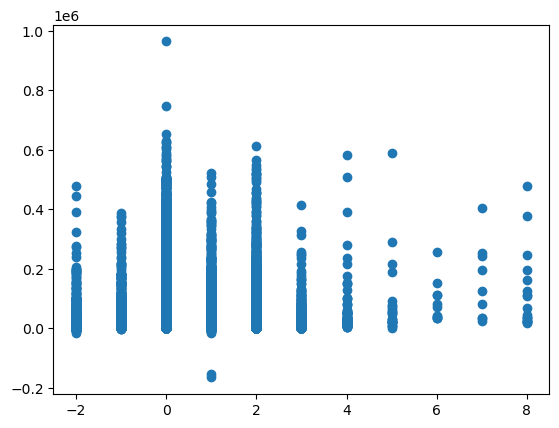

In [457]:
plt.scatter(df['SEP_PAY'],df['SEP_BILL'])

### Line Plot

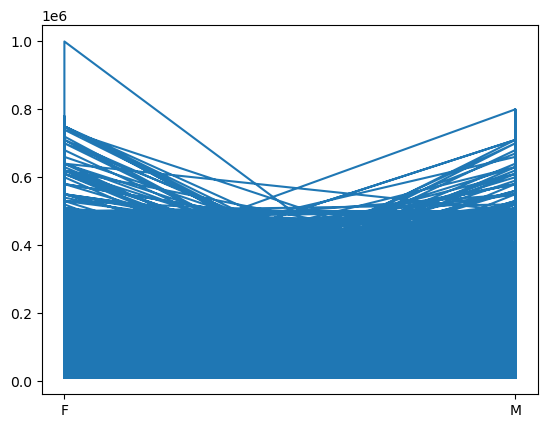

In [458]:
plt.plot(df['SEX'],df['LIMIT_BAL'])

### HistoGraph

<Axes: ylabel='Frequency'>

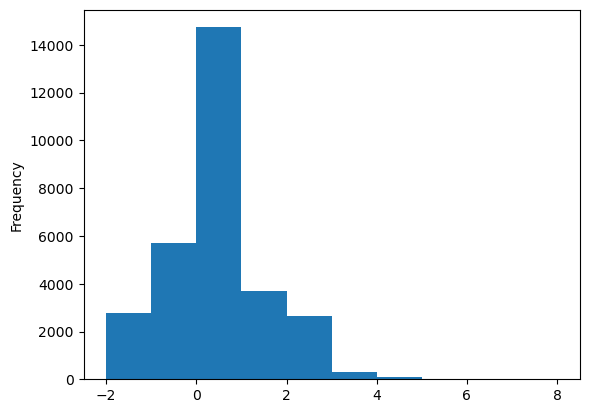

In [459]:
df['SEP_PAY'].plot(kind = 'hist')

### Line Plot

<Axes: ylabel='Density'>

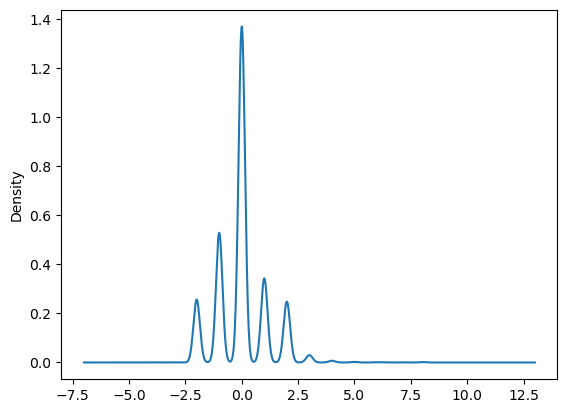

In [460]:
df['SEP_PAY'].plot(kind = 'density')

### Historgram 

(array([2.7590e+03, 5.6860e+03, 1.4737e+04, 3.6880e+03, 2.6670e+03,
        3.2200e+02, 7.6000e+01, 2.6000e+01, 1.1000e+01, 2.8000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <BarContainer object of 10 artists>)

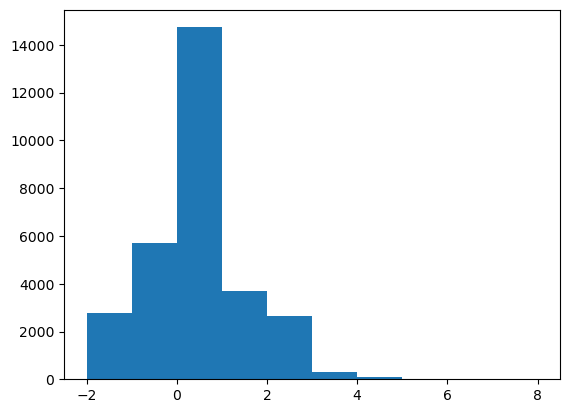

In [461]:
plt.hist(df['SEP_PAY'], bins=10)

## Seaborn Plots 
### Finding Outliers using Box Plot

In [604]:
# 30/06/2025

<Axes: >

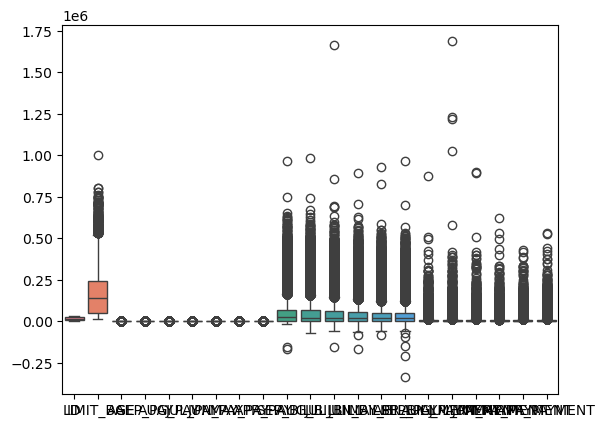

In [463]:
sns.boxplot(data=df)

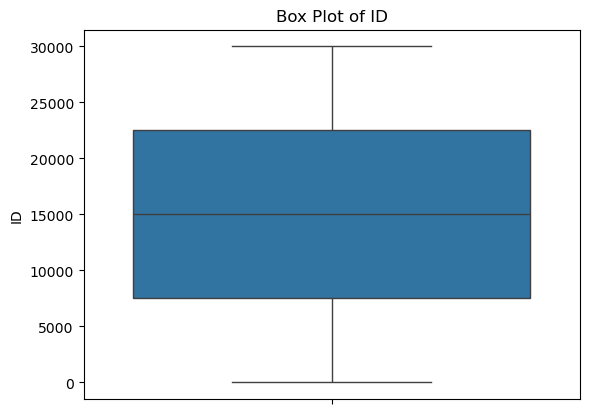

<Figure size 400x500 with 0 Axes>

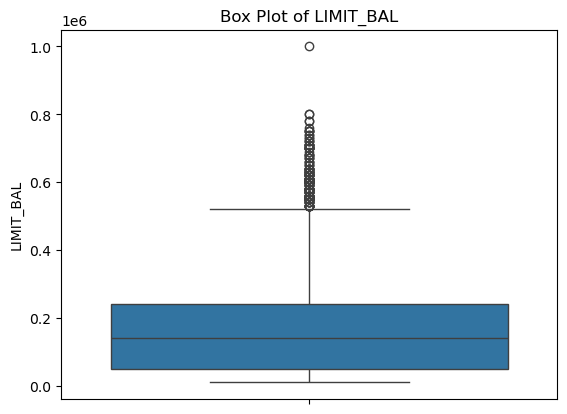

<Figure size 400x500 with 0 Axes>

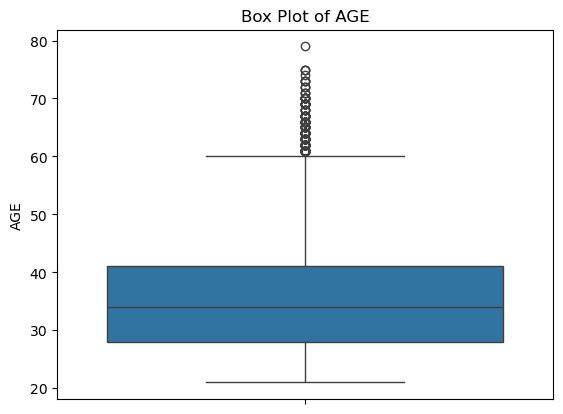

<Figure size 400x500 with 0 Axes>

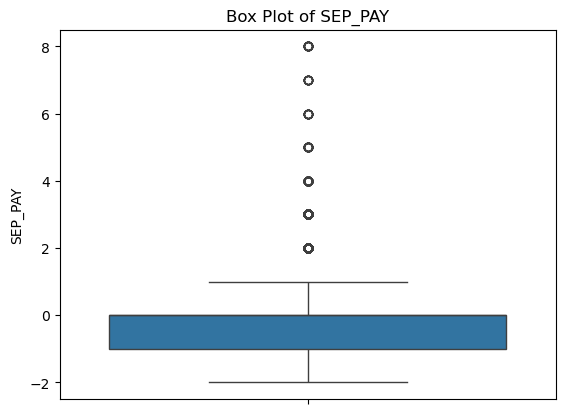

<Figure size 400x500 with 0 Axes>

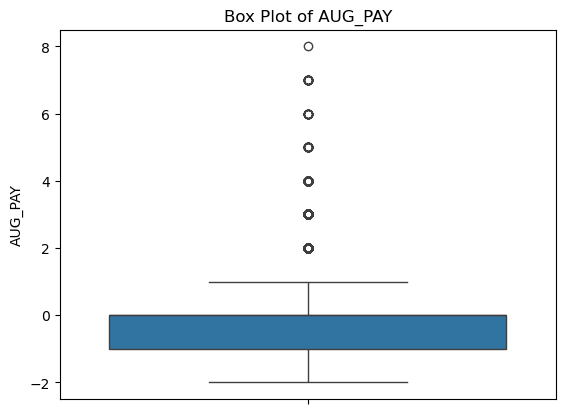

<Figure size 400x500 with 0 Axes>

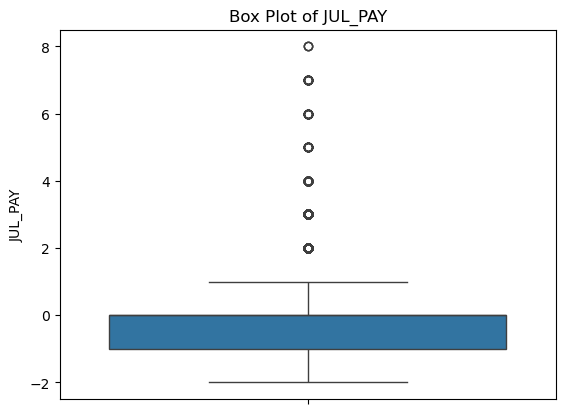

<Figure size 400x500 with 0 Axes>

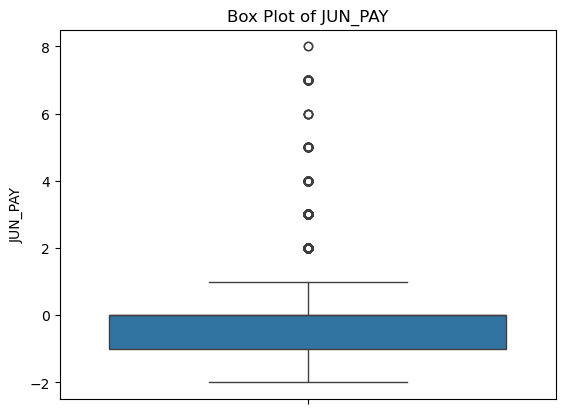

<Figure size 400x500 with 0 Axes>

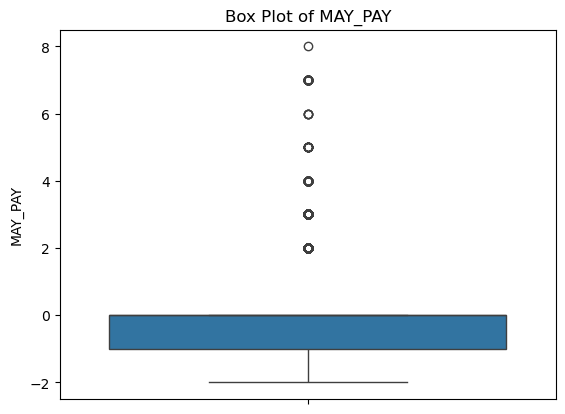

<Figure size 400x500 with 0 Axes>

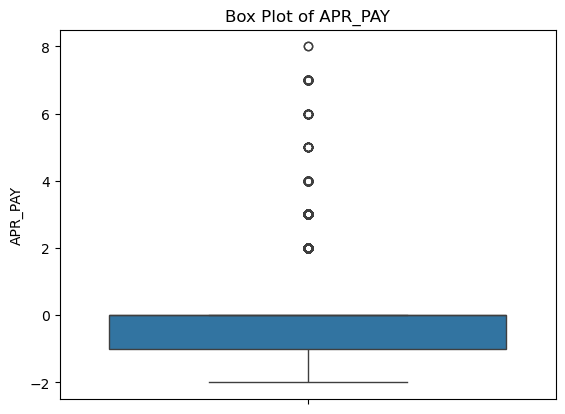

<Figure size 400x500 with 0 Axes>

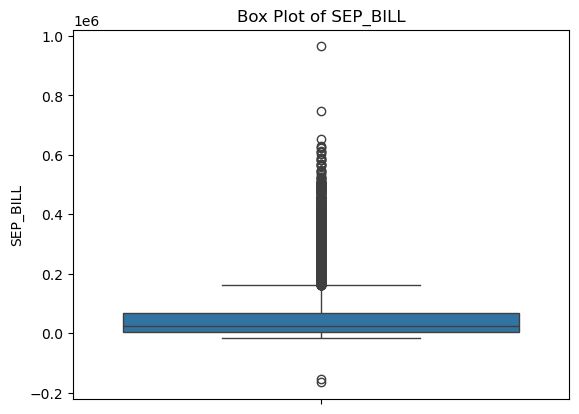

<Figure size 400x500 with 0 Axes>

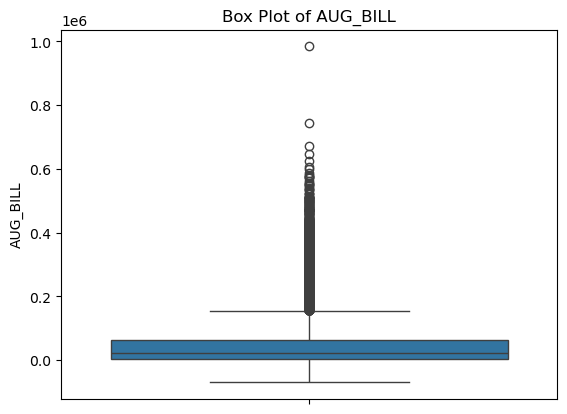

<Figure size 400x500 with 0 Axes>

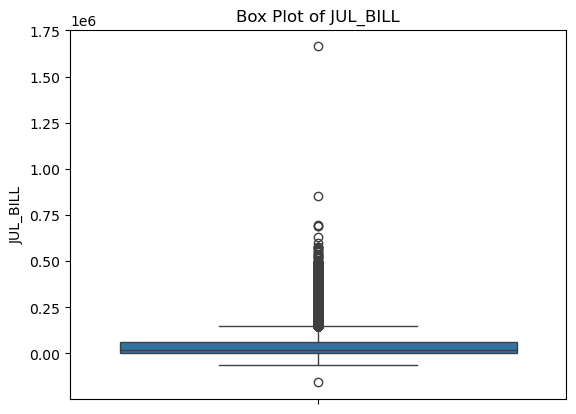

<Figure size 400x500 with 0 Axes>

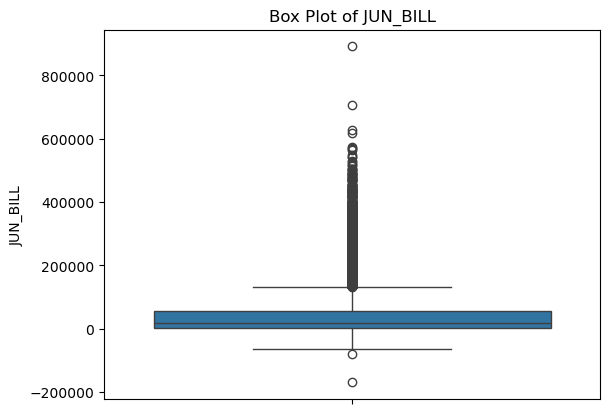

<Figure size 400x500 with 0 Axes>

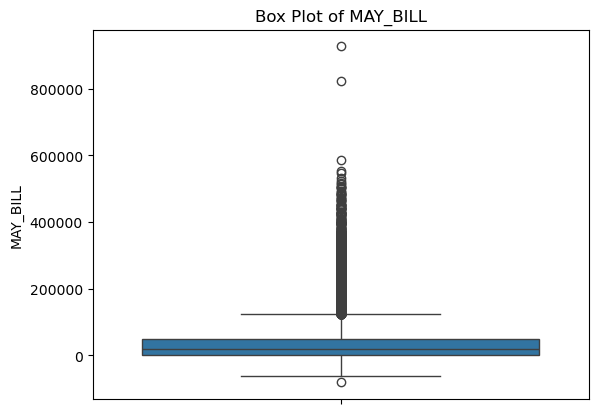

<Figure size 400x500 with 0 Axes>

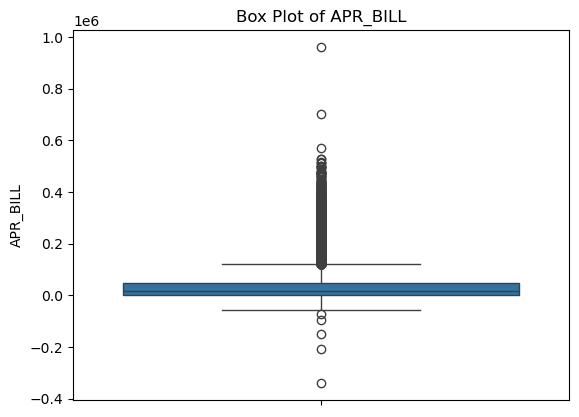

<Figure size 400x500 with 0 Axes>

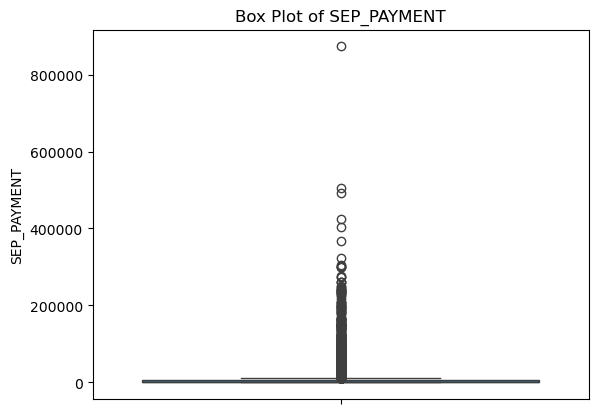

<Figure size 400x500 with 0 Axes>

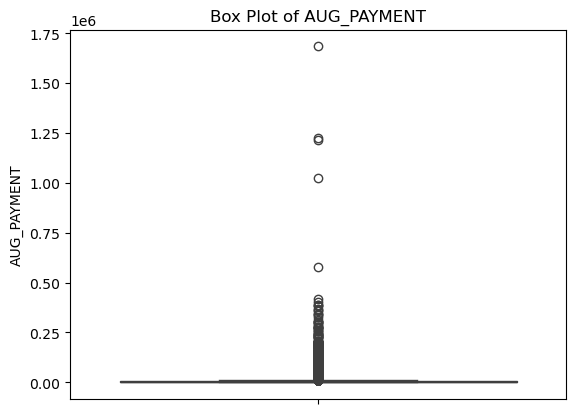

<Figure size 400x500 with 0 Axes>

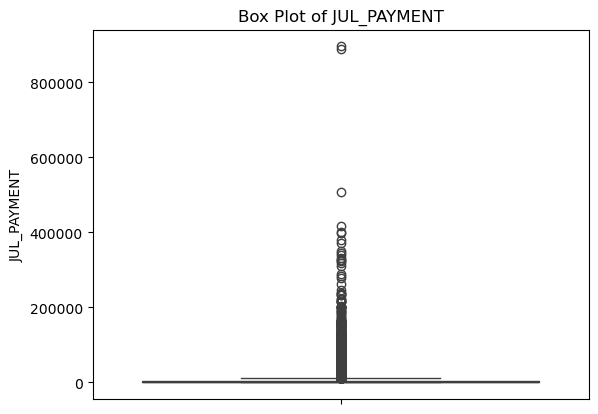

<Figure size 400x500 with 0 Axes>

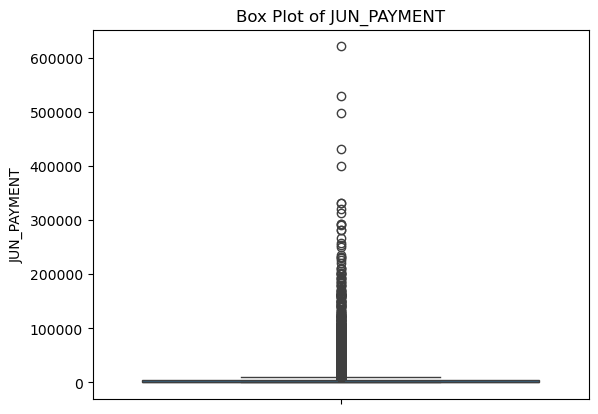

<Figure size 400x500 with 0 Axes>

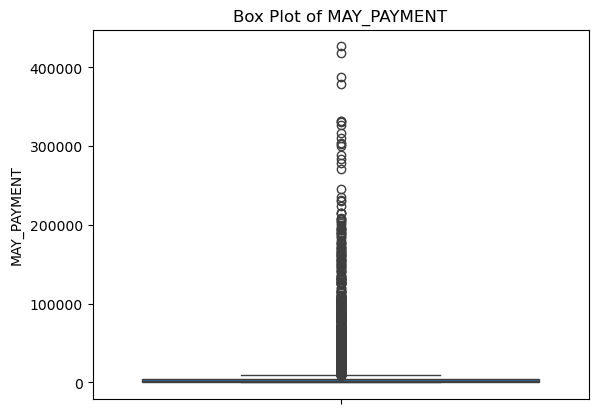

<Figure size 400x500 with 0 Axes>

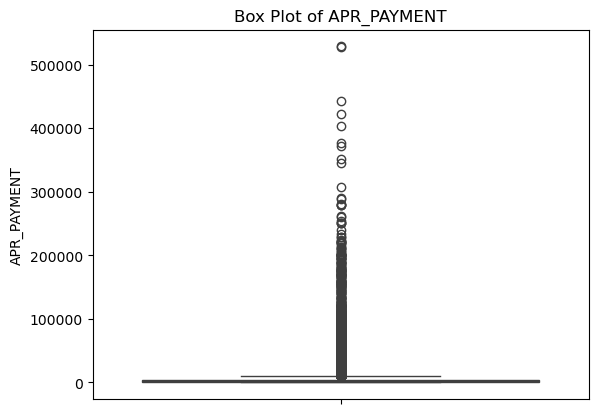

<Figure size 400x500 with 0 Axes>

In [464]:
# Loop through numeric columns 

for col in df.select_dtypes(include = 'number').columns:
    sns.boxplot(y = df[col])
    plt.title(f'Box Plot of {col}')
    plt.figure(figsize = (4,5))
    plt.show()

### Calculate IQR

In [465]:
for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
# Define bounds (Lower and upper)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
# Filter out outliers
    clean_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]

In [466]:
df1 = pd.DataFrame(clean_data)
df1

APR_PAYMENT
0                0
1             2000
2             5000
3             1000
4              679
...            ...
29995         1000
29996            0
29997         3100
29998         1804
29999         1000

[27042 rows x 1 columns]

In [467]:
clean_data

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: APR_PAYMENT, Length: 27042, dtype: int64

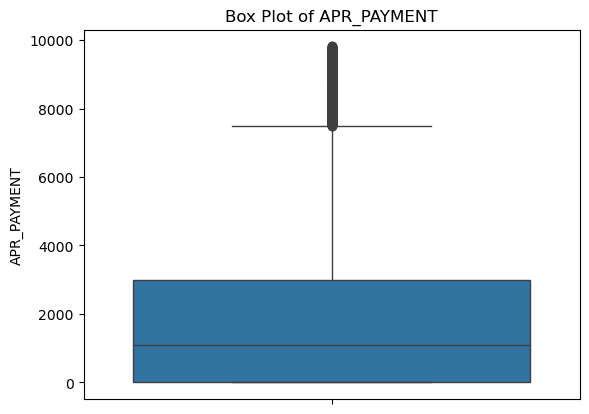

<Figure size 400x500 with 0 Axes>

In [468]:
for col in df1.select_dtypes(include = 'number').columns:
    sns.boxplot(y = df1[col])
    plt.title(f'Box Plot of {col}')
    plt.figure(figsize = (4,5))
    plt.show()

<Axes: ylabel='APR_PAYMENT'>

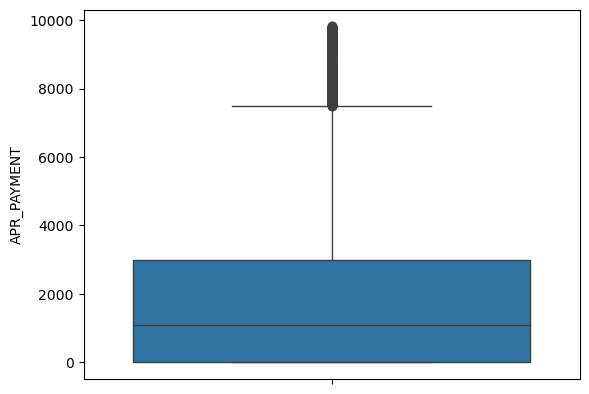

In [469]:
sns.boxplot(y = clean_data)

### Function to apply IQR method to fix outliers 

In [470]:
def fix_outliers_iqr(df):     
    num = df.select_dtypes(include='number').columns
    for col in num: 
        q1 = df[col].quantile(0.25) 
        q3 = df[col].quantile(0.75) 
        iqr = q3 - q1 
        lower_bound = q1 - 1.5 * iqr 
        upper_bound = q3 + 1.5 * iqr 
# Replace outliers with the respective bounds 
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x) 
    return df

In [471]:
df1 = fix_outliers_iqr(df)
df1

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE   AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED  24.0      1.5      1.5   
1          2   120000.0   F           UG   SINGLE  26.0     -1.0      1.5   
2          3    90000.0   F           UG   SINGLE  34.0      0.0      0.0   
3          4    50000.0   F           UG  MARRIED  37.0      0.0      0.0   
4          5    50000.0   M           UG  MARRIED  57.0     -1.0      0.0   
...      ...        ...  ..          ...      ...   ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED  39.0      0.0      0.0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE  43.0     -1.0     -1.0   
29997  29998    30000.0   M           UG   SINGLE  37.0      1.5      1.5   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED  41.0      1.0     -1.0   
29999  30000    50000.0   M           UG  MARRIED  46.0      0.0      0.0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0         -1.0     -1.0  ...       0.0       0.0       0.0          0.0   
1          0.0      0.0  ...    3272.0    3455.0    3261.0          0.0   
2          0.0      0.0  ...   14331.0   14948.0   15549.0       1518.0   
3          0.0      0.0  ...   28314.0   28959.0   29547.0       2000.0   
4         -1.0      0.0  ...   20940.0   19146.0   19131.0       2000.0   
...        ...      ...  ...       ...       ...       ...          ...   
29995      0.0      0.0  ...   88004.0   31237.0   15980.0       8500.0   
29996     -1.0     -1.0  ...    8979.0    5190.0       0.0       1837.0   
29997      1.5     -1.0  ...   20878.0   20582.0   19357.0          0.0   
29998      0.0      0.0  ...   52774.0   11855.0   48944.0      11015.0   
29999      0.0      0.0  ...   36535.0   32428.0   15313.0       2078.0   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0            689.0          0.0          0.0          0.0          0.0     YES  
1           1000.0       1000.0       1000.0          0.0       2000.0     YES  
2           1500.0       1000.0       1000.0       1000.0       5000.0      NO  
3           2019.0       1200.0       1100.0       1069.0       1000.0      NO  
4          11250.5      10000.0       9000.0        689.0        679.0      NO  
...            ...          ...          ...          ...          ...     ...  
29995      11250.5       5003.0       3047.0       5000.0       1000.0      NO  
29996       3526.0       8998.0        129.0          0.0          0.0      NO  
29997          0.0      10677.5       4200.0       2000.0       3100.0     YES  
29998       3409.0       1178.0       1926.0       9700.0       1804.0     YES  
29999       1800.0       1430.0       1000.0       1000.0       1000.0     YES  

[30000 rows x 25 columns]

<Axes: >

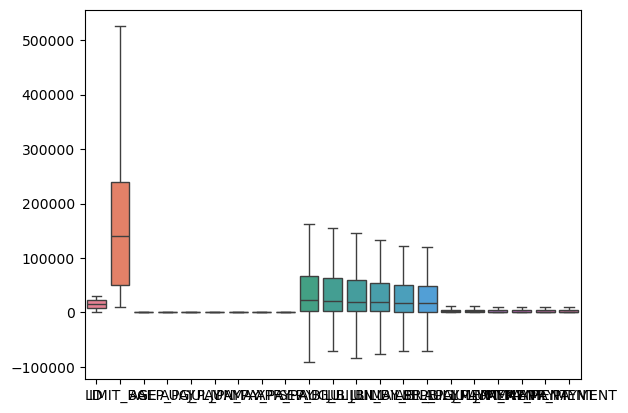

In [472]:
sns.boxplot(data = df1)

In [473]:
# 04 July
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE   AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED  24.0      1.5      1.5   
1          2   120000.0   F           UG   SINGLE  26.0     -1.0      1.5   
2          3    90000.0   F           UG   SINGLE  34.0      0.0      0.0   
3          4    50000.0   F           UG  MARRIED  37.0      0.0      0.0   
4          5    50000.0   M           UG  MARRIED  57.0     -1.0      0.0   
...      ...        ...  ..          ...      ...   ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED  39.0      0.0      0.0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE  43.0     -1.0     -1.0   
29997  29998    30000.0   M           UG   SINGLE  37.0      1.5      1.5   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED  41.0      1.0     -1.0   
29999  30000    50000.0   M           UG  MARRIED  46.0      0.0      0.0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0         -1.0     -1.0  ...       0.0       0.0       0.0          0.0   
1          0.0      0.0  ...    3272.0    3455.0    3261.0          0.0   
2          0.0      0.0  ...   14331.0   14948.0   15549.0       1518.0   
3          0.0      0.0  ...   28314.0   28959.0   29547.0       2000.0   
4         -1.0      0.0  ...   20940.0   19146.0   19131.0       2000.0   
...        ...      ...  ...       ...       ...       ...          ...   
29995      0.0      0.0  ...   88004.0   31237.0   15980.0       8500.0   
29996     -1.0     -1.0  ...    8979.0    5190.0       0.0       1837.0   
29997      1.5     -1.0  ...   20878.0   20582.0   19357.0          0.0   
29998      0.0      0.0  ...   52774.0   11855.0   48944.0      11015.0   
29999      0.0      0.0  ...   36535.0   32428.0   15313.0       2078.0   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0            689.0          0.0          0.0          0.0          0.0     YES  
1           1000.0       1000.0       1000.0          0.0       2000.0     YES  
2           1500.0       1000.0       1000.0       1000.0       5000.0      NO  
3           2019.0       1200.0       1100.0       1069.0       1000.0      NO  
4          11250.5      10000.0       9000.0        689.0        679.0      NO  
...            ...          ...          ...          ...          ...     ...  
29995      11250.5       5003.0       3047.0       5000.0       1000.0      NO  
29996       3526.0       8998.0        129.0          0.0          0.0      NO  
29997          0.0      10677.5       4200.0       2000.0       3100.0     YES  
29998       3409.0       1178.0       1926.0       9700.0       1804.0     YES  
29999       1800.0       1430.0       1000.0       1000.0       1000.0     YES  

[30000 rows x 25 columns]

In [474]:
numeric_columns = df.select_dtypes(include = 'number')
numeric_columns

ID  LIMIT_BAL   AGE  SEP_PAY  AUG_PAY  JUL_PAY  JUN_PAY  MAY_PAY  \
0          1    20000.0  24.0      1.5      1.5     -1.0     -1.0     -2.0   
1          2   120000.0  26.0     -1.0      1.5      0.0      0.0      0.0   
2          3    90000.0  34.0      0.0      0.0      0.0      0.0      0.0   
3          4    50000.0  37.0      0.0      0.0      0.0      0.0      0.0   
4          5    50000.0  57.0     -1.0      0.0     -1.0      0.0      0.0   
...      ...        ...   ...      ...      ...      ...      ...      ...   
29995  29996   220000.0  39.0      0.0      0.0      0.0      0.0      0.0   
29996  29997   150000.0  43.0     -1.0     -1.0     -1.0     -1.0      0.0   
29997  29998    30000.0  37.0      1.5      1.5      1.5     -1.0      0.0   
29998  29999    80000.0  41.0      1.0     -1.0      0.0      0.0      0.0   
29999  30000    50000.0  46.0      0.0      0.0      0.0      0.0      0.0   

       APR_PAY    SEP_BILL  ...  JUL_BILL  JUN_BILL  MAY_BILL  APR_BILL  \
0         -2.0    3913.000  ...     689.0       0.0       0.0       0.0   
1          1.5    2682.000  ...    2682.0    3272.0    3455.0    3261.0   
2          0.0   29239.000  ...   13559.0   14331.0   14948.0   15549.0   
3          0.0   46990.000  ...   49291.0   28314.0   28959.0   29547.0   
4          0.0    8617.000  ...   35835.0   20940.0   19146.0   19131.0   
...        ...         ...  ...       ...       ...       ...       ...   
29995      0.0  162389.375  ...  146412.5   88004.0   31237.0   15980.0   
29996      0.0    1683.000  ...    3502.0    8979.0    5190.0       0.0   
29997      0.0    3565.000  ...    2758.0   20878.0   20582.0   19357.0   
29998     -1.0   -1645.000  ...   76304.0   52774.0   11855.0   48944.0   
29999      0.0   47929.000  ...   49764.0   36535.0   32428.0   15313.0   

       SEP_PAYMENT  AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  \
0              0.0        689.0          0.0          0.0          0.0   
1              0.0       1000.0       1000.0       1000.0          0.0   
2           1518.0       1500.0       1000.0       1000.0       1000.0   
3           2000.0       2019.0       1200.0       1100.0       1069.0   
4           2000.0      11250.5      10000.0       9000.0        689.0   
...            ...          ...          ...          ...          ...   
29995       8500.0      11250.5       5003.0       3047.0       5000.0   
29996       1837.0       3526.0       8998.0        129.0          0.0   
29997          0.0          0.0      10677.5       4200.0       2000.0   
29998      11015.0       3409.0       1178.0       1926.0       9700.0   
29999       2078.0       1800.0       1430.0       1000.0       1000.0   

       APR_PAYMENT  
0              0.0  
1           2000.0  
2           5000.0  
3           1000.0  
4            679.0  
...            ...  
29995       1000.0  
29996          0.0  
29997       3100.0  
29998       1804.0  
29999       1000.0  

[30000 rows x 21 columns]

## Correlation between all Numerical Columns

In [475]:
cor = numeric_columns.corr()
cor

ID  LIMIT_BAL       AGE   SEP_PAY   AUG_PAY   JUL_PAY  \
ID           1.000000   0.026428  0.019147 -0.032481 -0.010198 -0.014786   
LIMIT_BAL    0.026428   1.000000  0.144929 -0.281256 -0.308840 -0.296653   
AGE          0.019147   0.144929  1.000000 -0.047814 -0.059234 -0.060760   
SEP_PAY     -0.032481  -0.281256 -0.047814  1.000000  0.645076  0.559973   
AUG_PAY     -0.010198  -0.308840 -0.059234  0.645076  1.000000  0.786833   
JUL_PAY     -0.014786  -0.296653 -0.060760  0.559973  0.786833  1.000000   
JUN_PAY     -0.003767  -0.275536 -0.058576  0.528837  0.694651  0.792073   
MAY_PAY     -0.022187  -0.254271 -0.062664  0.503439  0.658172  0.705038   
APR_PAY     -0.017826  -0.237806 -0.055502  0.476768  0.615124  0.653343   
SEP_BILL     0.017410   0.198285  0.038029  0.251773  0.345197  0.319670   
AUG_BILL     0.016977   0.191136  0.036031  0.254363  0.343849  0.357306   
JUL_BILL     0.022069   0.197736  0.034817  0.246216  0.333444  0.349417   
JUN_BILL     0.040608   0.209352  0.029304  0.241646  0.325990  0.343079   
MAY_BILL     0.015959   0.211746  0.026337  0.239012  0.320417  0.335284   
APR_BILL     0.018622   0.207354  0.024887  0.234894  0.315323  0.327733   
SEP_PAYMENT  0.010365   0.343157  0.038060 -0.102186 -0.044281  0.114352   
AUG_PAYMENT  0.041859   0.353506  0.047249 -0.095138 -0.010027 -0.040379   
JUL_PAYMENT  0.078819   0.358593  0.039551 -0.087057 -0.011084  0.000133   
JUN_PAYMENT  0.016662   0.349563  0.044055 -0.067292  0.002347  0.021869   
MAY_PAYMENT  0.012433   0.354400  0.040017 -0.061694  0.009338  0.028235   
APR_PAYMENT  0.029365   0.371924  0.034892 -0.076801 -0.003035  0.009207   

              JUN_PAY   MAY_PAY   APR_PAY  SEP_BILL  ...  JUL_BILL  JUN_BILL  \
ID          -0.003767 -0.022187 -0.017826  0.017410  ...  0.022069  0.040608   
LIMIT_BAL   -0.275536 -0.254271 -0.237806  0.198285  ...  0.197736  0.209352   
AGE         -0.058576 -0.062664 -0.055502  0.038029  ...  0.034817  0.029304   
SEP_PAY      0.528837  0.503439  0.476768  0.251773  ...  0.246216  0.241646   
AUG_PAY      0.694651  0.658172  0.615124  0.345197  ...  0.333444  0.325990   
JUL_PAY      0.792073  0.705038  0.653343  0.319670  ...  0.349417  0.343079   
JUN_PAY      1.000000  0.820382  0.719471  0.319552  ...  0.383900  0.379892   
MAY_PAY      0.820382  1.000000  0.818823  0.318971  ...  0.378484  0.414625   
APR_PAY      0.719471  0.818823  1.000000  0.316668  ...  0.370129  0.401270   
SEP_BILL     0.319552  0.318971  0.316668  1.000000  ...  0.899177  0.852575   
AUG_BILL     0.351217  0.347378  0.343857  0.945939  ...  0.938762  0.887241   
JUL_BILL     0.383900  0.378484  0.370129  0.899177  ...  1.000000  0.931079   
JUN_BILL     0.379892  0.414625  0.401270  0.852575  ...  0.931079  1.000000   
MAY_BILL     0.370541  0.406531  0.433413  0.819291  ...  0.886275  0.934930   
APR_BILL     0.360876  0.391663  0.419766  0.793632  ...  0.853345  0.895208   
SEP_PAYMENT  0.087344  0.084345  0.088892  0.466516  ...  0.506975  0.484007   
AUG_PAYMENT  0.126888  0.107406  0.091165  0.424701  ...  0.525979  0.487267   
JUL_PAYMENT -0.016672  0.134246  0.113354  0.392170  ...  0.415875  0.510493   
JUN_PAYMENT  0.037965  0.022686  0.156453  0.403331  ...  0.425228  0.438948   
MAY_PAYMENT  0.055232  0.070511  0.045744  0.394699  ...  0.423007  0.438305   
APR_PAYMENT  0.040393  0.063572  0.078345  0.379730  ...  0.405021  0.418825   

             MAY_BILL  APR_BILL  SEP_PAYMENT  AUG_PAYMENT  JUL_PAYMENT  \
ID           0.015959  0.018622     0.010365     0.041859     0.078819   
LIMIT_BAL    0.211746  0.207354     0.343157     0.353506     0.358593   
AGE          0.026337  0.024887     0.038060     0.047249     0.039551   
SEP_PAY      0.239012  0.234894    -0.102186    -0.095138    -0.087057   
AUG_PAY      0.320417  0.315323    -0.044281    -0.010027    -0.011084   
JUL_PAY      0.335284  0.327733     0.114352    -0.040379     0.000133   
JUN_PAY      0.370541  0.360876     0.087344     0.126888    -0.016

## Heat Map

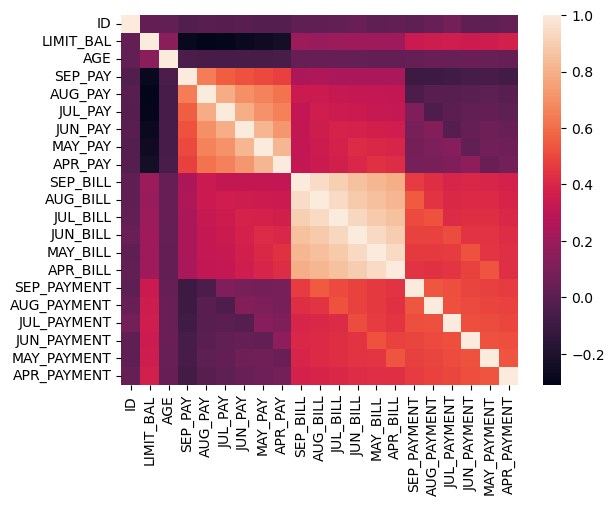

In [476]:
a = sns.heatmap(cor)

<Axes: >

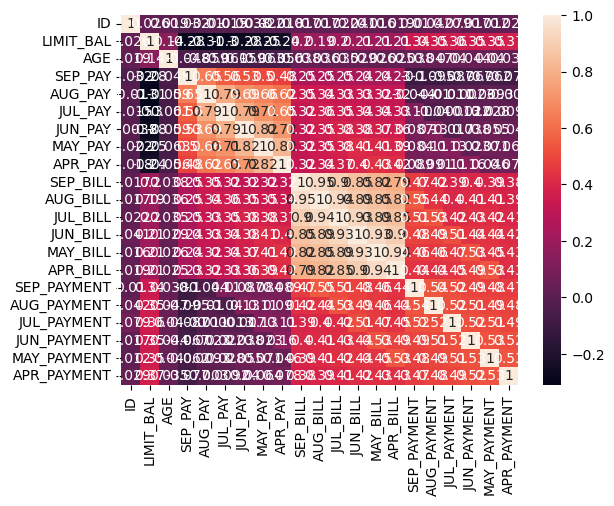

In [477]:
sns.heatmap(cor, annot = True)

<Axes: >

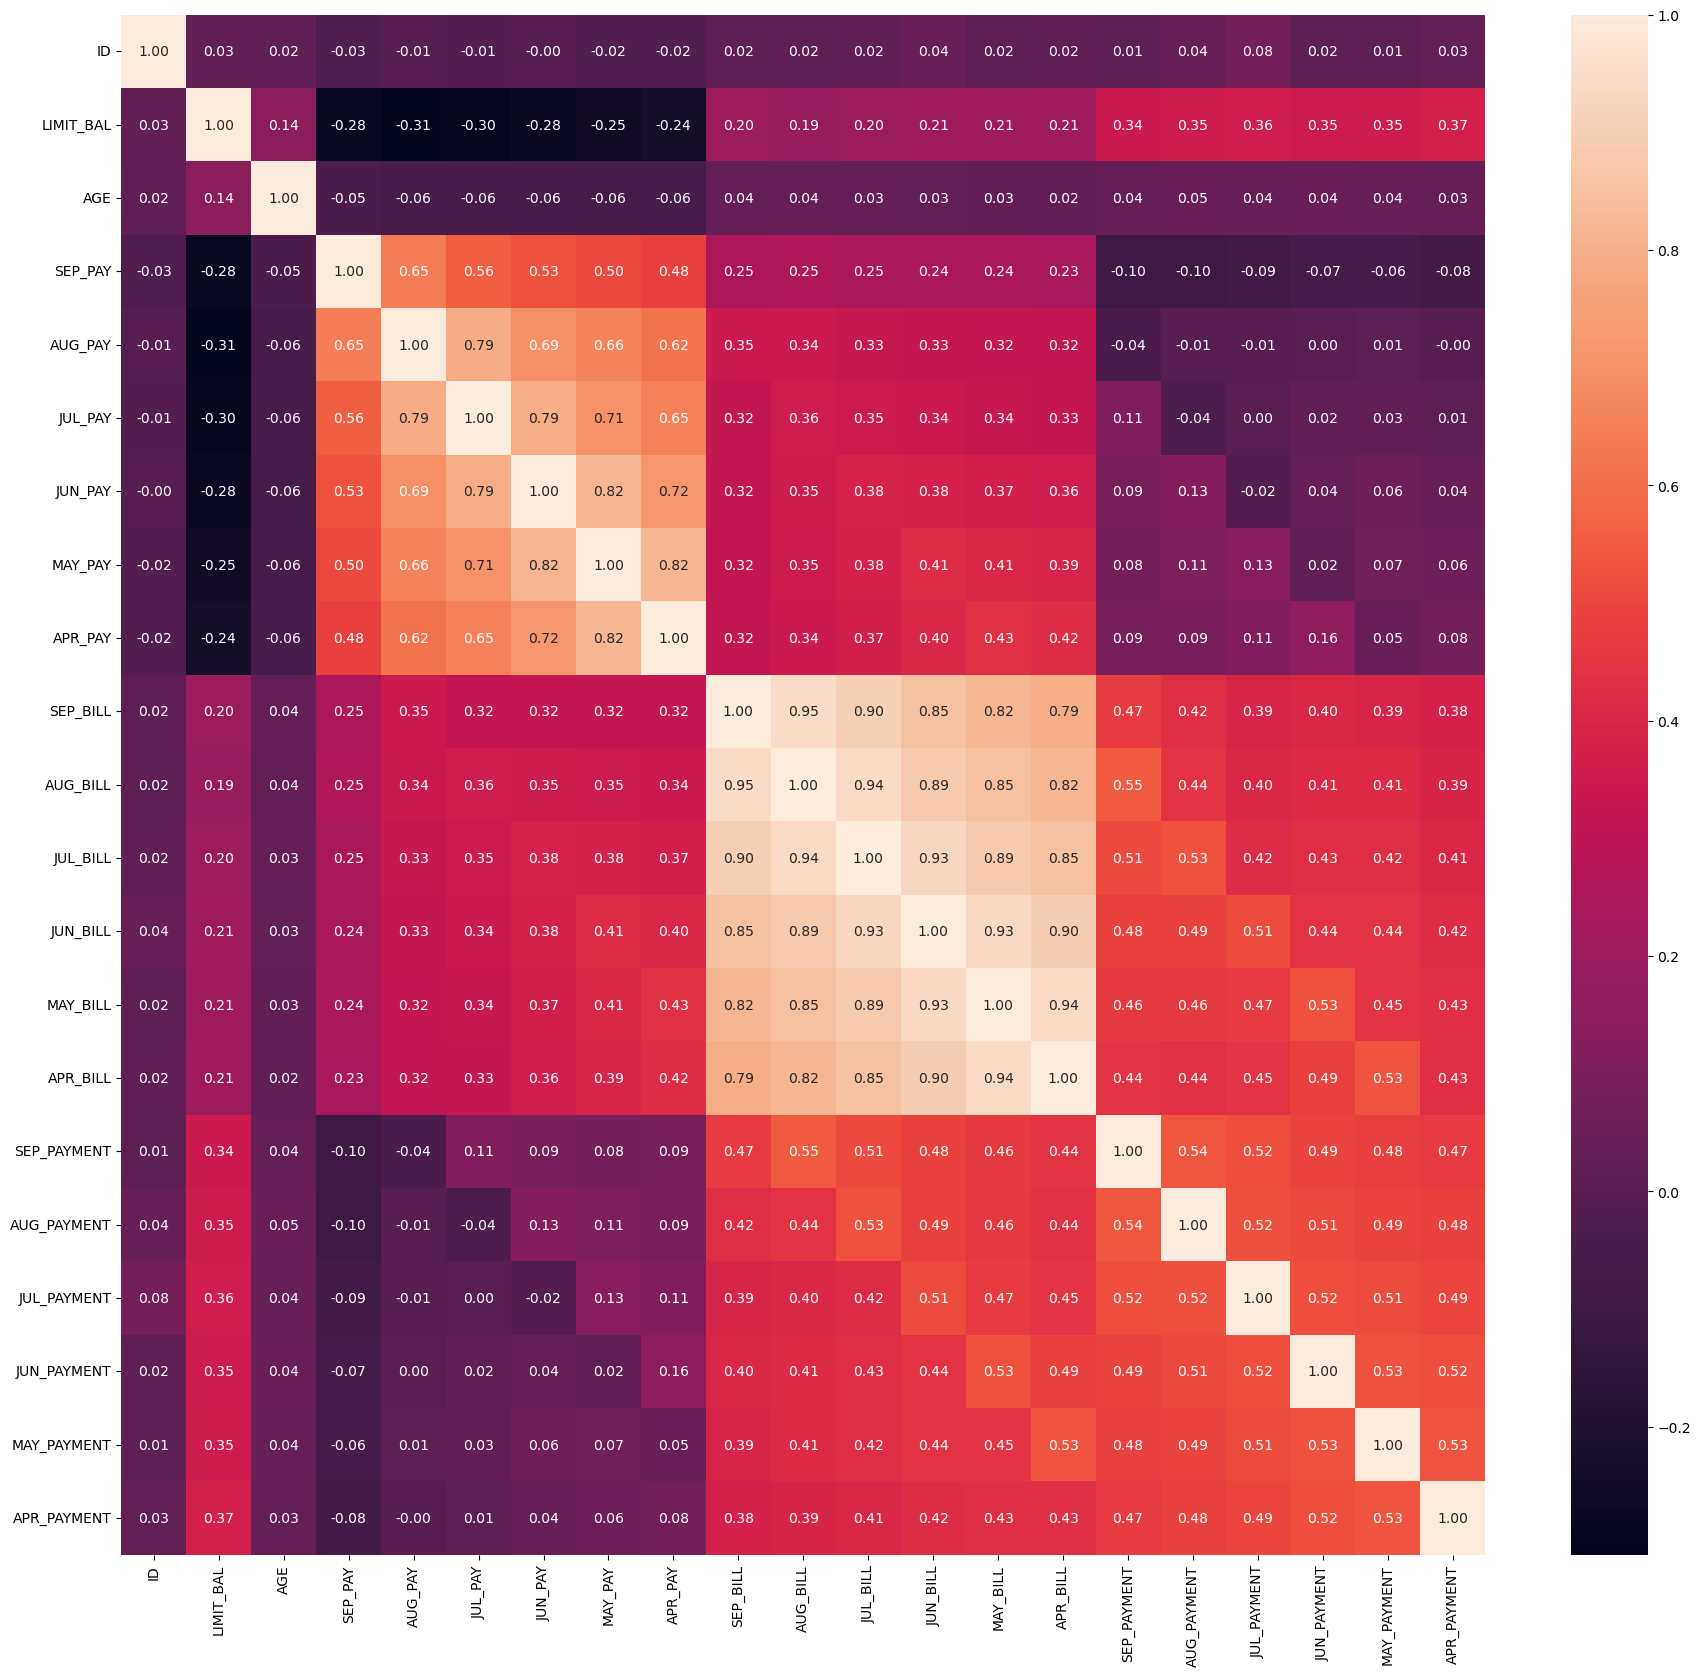

In [478]:
plt.figure(figsize = (22,20))
sns.heatmap(cor, annot = True, fmt = ".2f")

<Axes: >

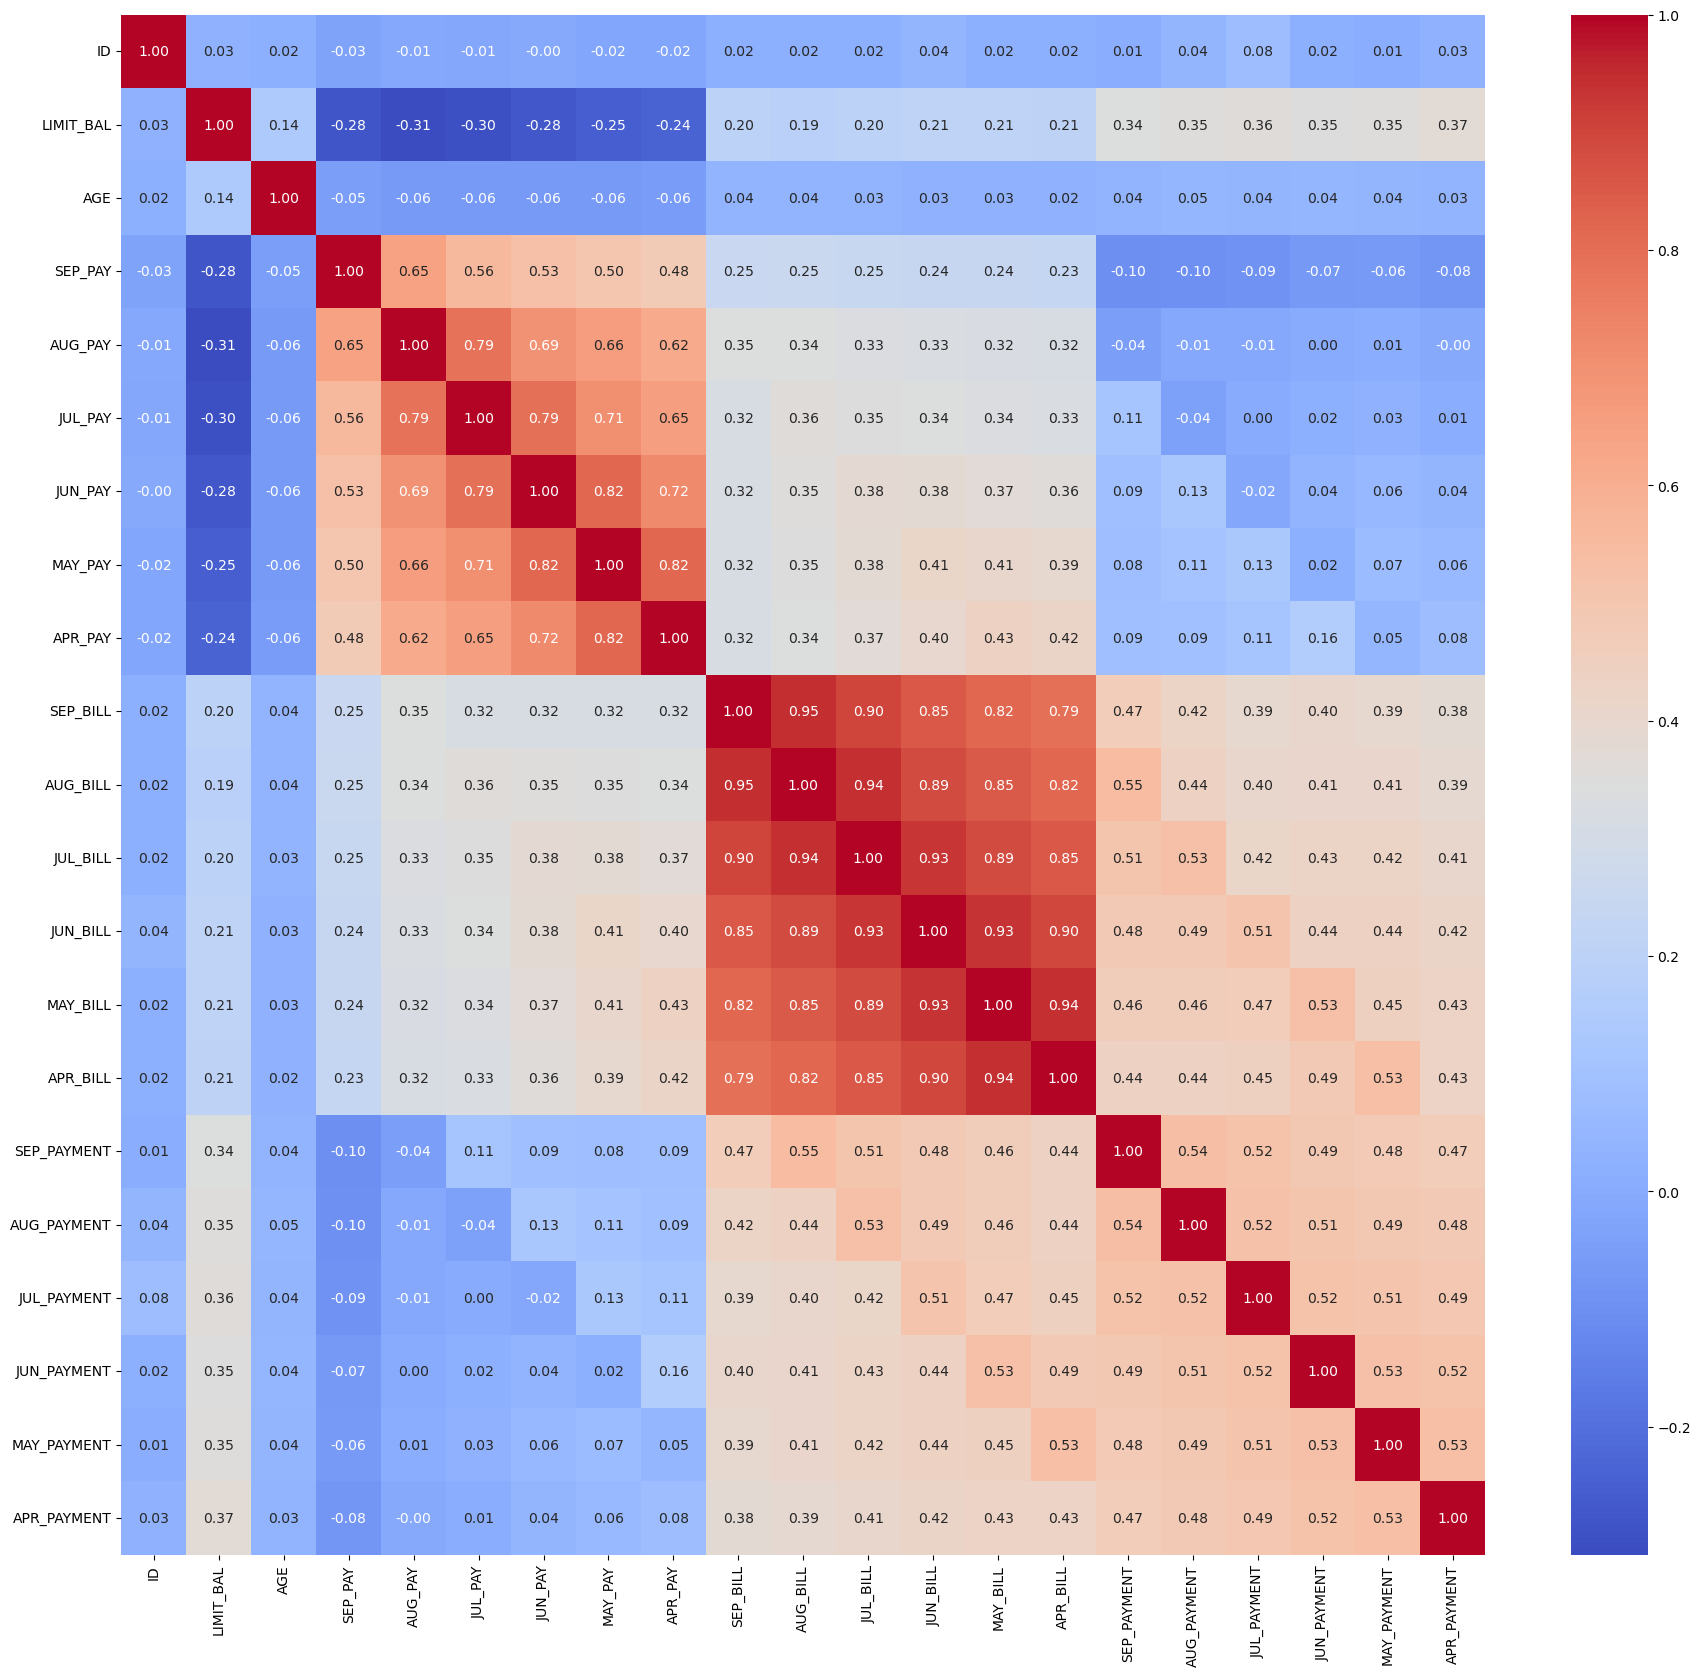

In [479]:
plt.figure(figsize = (22,20))
sns.heatmap(cor, annot = True, fmt = ".2f", cmap = "coolwarm")

<Axes: >

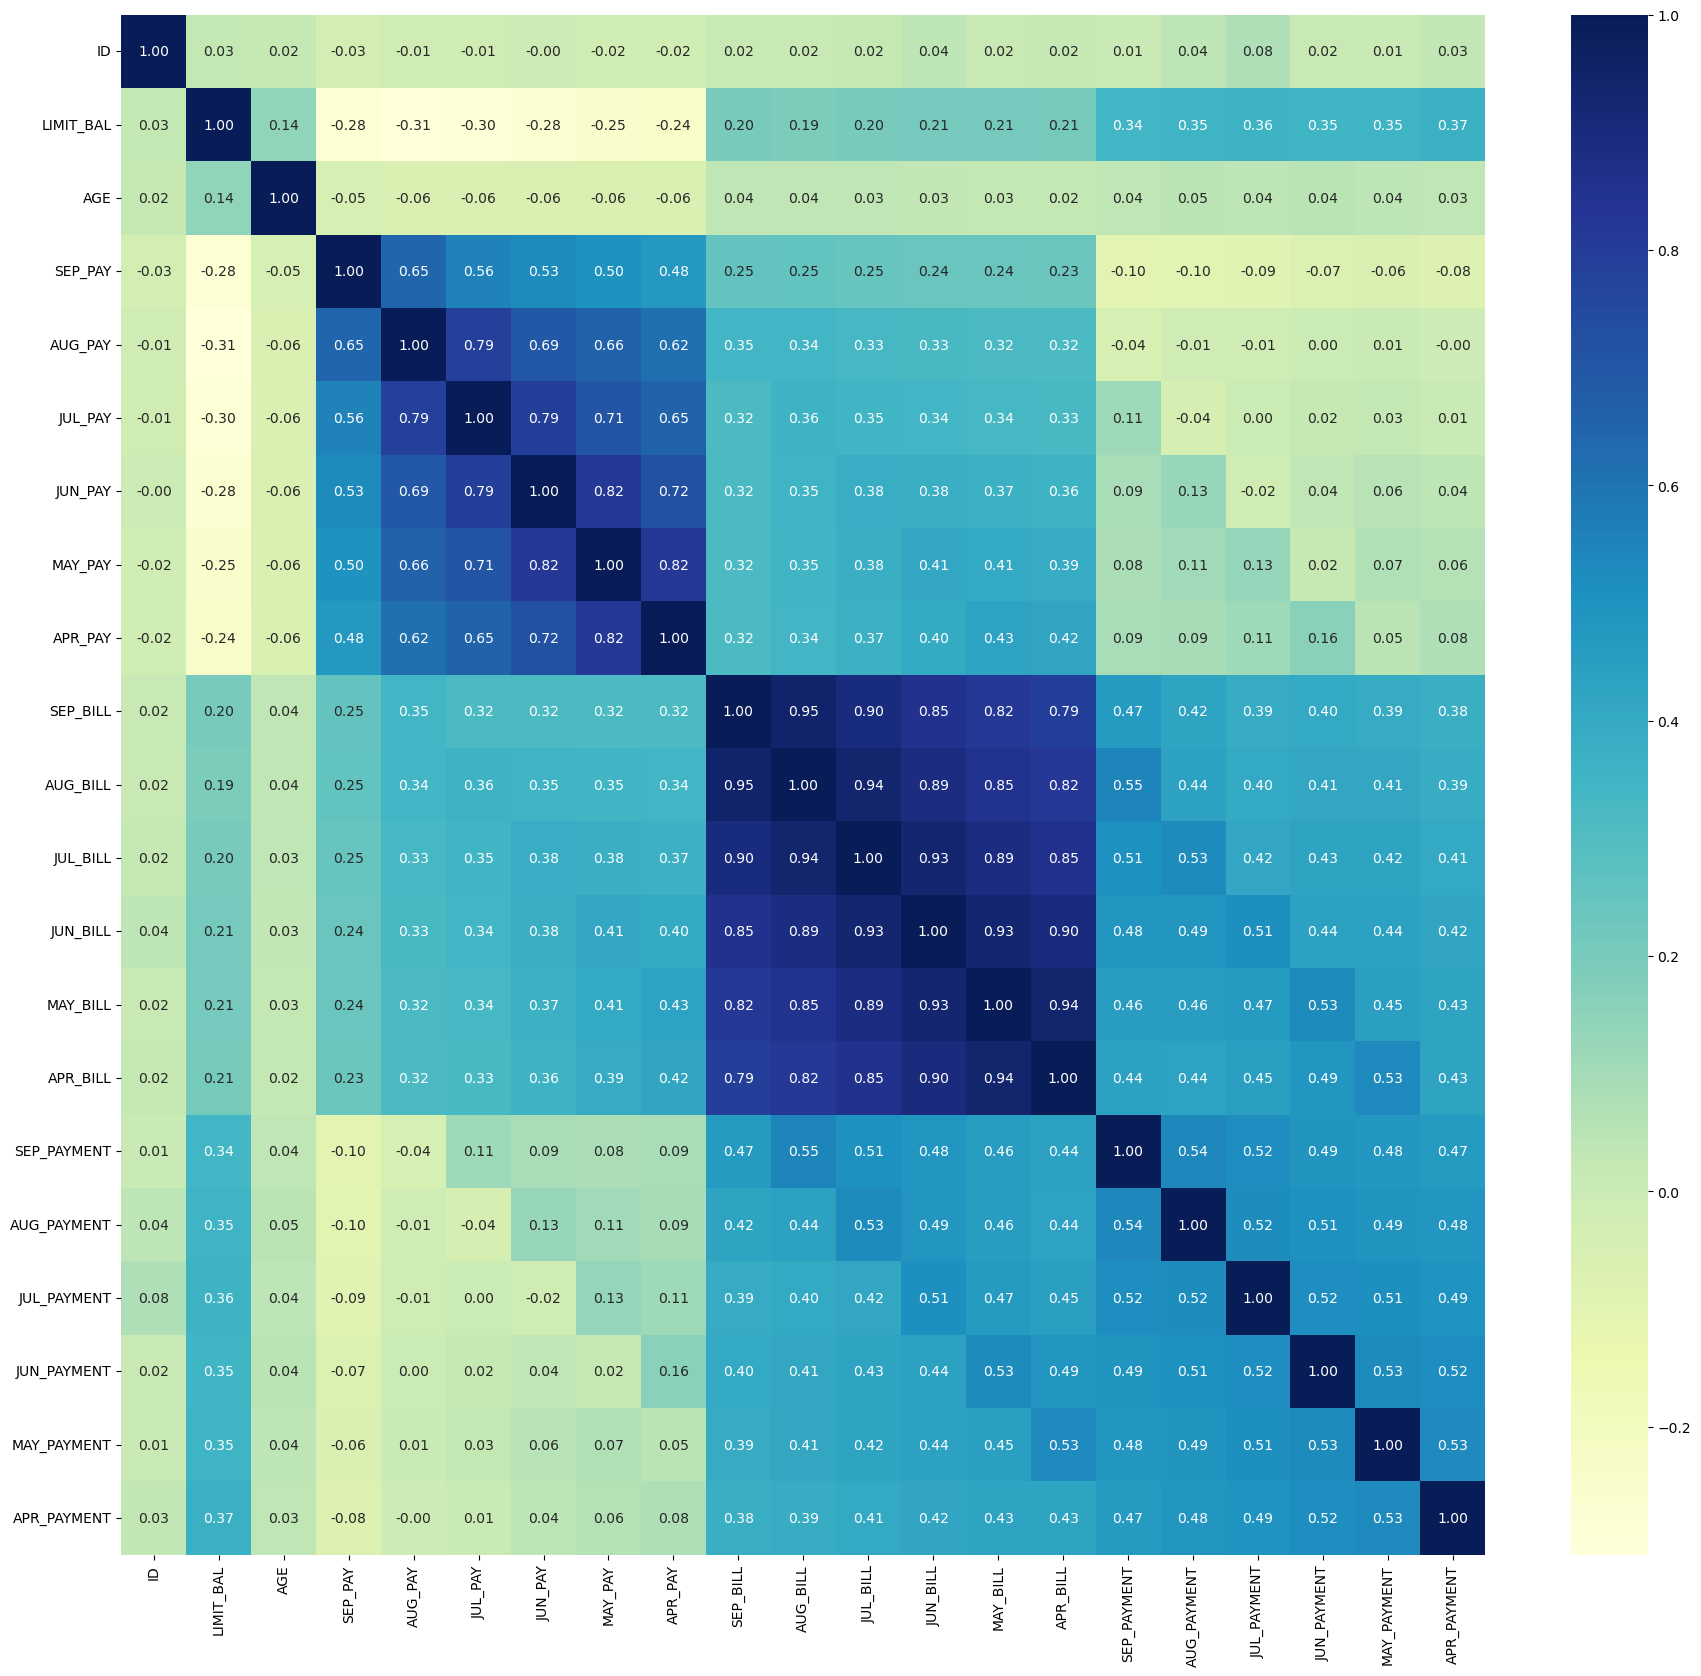

In [480]:
plt.figure(figsize = (22,20))
sns.heatmap(cor, annot = True, fmt = ".2f", cmap = "YlGnBu")

In [481]:
# 09/07/2025
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE   AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED  24.0      1.5      1.5   
1          2   120000.0   F           UG   SINGLE  26.0     -1.0      1.5   
2          3    90000.0   F           UG   SINGLE  34.0      0.0      0.0   
3          4    50000.0   F           UG  MARRIED  37.0      0.0      0.0   
4          5    50000.0   M           UG  MARRIED  57.0     -1.0      0.0   
...      ...        ...  ..          ...      ...   ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED  39.0      0.0      0.0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE  43.0     -1.0     -1.0   
29997  29998    30000.0   M           UG   SINGLE  37.0      1.5      1.5   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED  41.0      1.0     -1.0   
29999  30000    50000.0   M           UG  MARRIED  46.0      0.0      0.0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0         -1.0     -1.0  ...       0.0       0.0       0.0          0.0   
1          0.0      0.0  ...    3272.0    3455.0    3261.0          0.0   
2          0.0      0.0  ...   14331.0   14948.0   15549.0       1518.0   
3          0.0      0.0  ...   28314.0   28959.0   29547.0       2000.0   
4         -1.0      0.0  ...   20940.0   19146.0   19131.0       2000.0   
...        ...      ...  ...       ...       ...       ...          ...   
29995      0.0      0.0  ...   88004.0   31237.0   15980.0       8500.0   
29996     -1.0     -1.0  ...    8979.0    5190.0       0.0       1837.0   
29997      1.5     -1.0  ...   20878.0   20582.0   19357.0          0.0   
29998      0.0      0.0  ...   52774.0   11855.0   48944.0      11015.0   
29999      0.0      0.0  ...   36535.0   32428.0   15313.0       2078.0   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0            689.0          0.0          0.0          0.0          0.0     YES  
1           1000.0       1000.0       1000.0          0.0       2000.0     YES  
2           1500.0       1000.0       1000.0       1000.0       5000.0      NO  
3           2019.0       1200.0       1100.0       1069.0       1000.0      NO  
4          11250.5      10000.0       9000.0        689.0        679.0      NO  
...            ...          ...          ...          ...          ...     ...  
29995      11250.5       5003.0       3047.0       5000.0       1000.0      NO  
29996       3526.0       8998.0        129.0          0.0          0.0      NO  
29997          0.0      10677.5       4200.0       2000.0       3100.0     YES  
29998       3409.0       1178.0       1926.0       9700.0       1804.0     YES  
29999       1800.0       1430.0       1000.0       1000.0       1000.0     YES  

[30000 rows x 25 columns]

In [482]:
df2 = df.select_dtypes(include = 'number')
df2

ID  LIMIT_BAL   AGE  SEP_PAY  AUG_PAY  JUL_PAY  JUN_PAY  MAY_PAY  \
0          1    20000.0  24.0      1.5      1.5     -1.0     -1.0     -2.0   
1          2   120000.0  26.0     -1.0      1.5      0.0      0.0      0.0   
2          3    90000.0  34.0      0.0      0.0      0.0      0.0      0.0   
3          4    50000.0  37.0      0.0      0.0      0.0      0.0      0.0   
4          5    50000.0  57.0     -1.0      0.0     -1.0      0.0      0.0   
...      ...        ...   ...      ...      ...      ...      ...      ...   
29995  29996   220000.0  39.0      0.0      0.0      0.0      0.0      0.0   
29996  29997   150000.0  43.0     -1.0     -1.0     -1.0     -1.0      0.0   
29997  29998    30000.0  37.0      1.5      1.5      1.5     -1.0      0.0   
29998  29999    80000.0  41.0      1.0     -1.0      0.0      0.0      0.0   
29999  30000    50000.0  46.0      0.0      0.0      0.0      0.0      0.0   

       APR_PAY    SEP_BILL  ...  JUL_BILL  JUN_BILL  MAY_BILL  APR_BILL  \
0         -2.0    3913.000  ...     689.0       0.0       0.0       0.0   
1          1.5    2682.000  ...    2682.0    3272.0    3455.0    3261.0   
2          0.0   29239.000  ...   13559.0   14331.0   14948.0   15549.0   
3          0.0   46990.000  ...   49291.0   28314.0   28959.0   29547.0   
4          0.0    8617.000  ...   35835.0   20940.0   19146.0   19131.0   
...        ...         ...  ...       ...       ...       ...       ...   
29995      0.0  162389.375  ...  146412.5   88004.0   31237.0   15980.0   
29996      0.0    1683.000  ...    3502.0    8979.0    5190.0       0.0   
29997      0.0    3565.000  ...    2758.0   20878.0   20582.0   19357.0   
29998     -1.0   -1645.000  ...   76304.0   52774.0   11855.0   48944.0   
29999      0.0   47929.000  ...   49764.0   36535.0   32428.0   15313.0   

       SEP_PAYMENT  AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  \
0              0.0        689.0          0.0          0.0          0.0   
1              0.0       1000.0       1000.0       1000.0          0.0   
2           1518.0       1500.0       1000.0       1000.0       1000.0   
3           2000.0       2019.0       1200.0       1100.0       1069.0   
4           2000.0      11250.5      10000.0       9000.0        689.0   
...            ...          ...          ...          ...          ...   
29995       8500.0      11250.5       5003.0       3047.0       5000.0   
29996       1837.0       3526.0       8998.0        129.0          0.0   
29997          0.0          0.0      10677.5       4200.0       2000.0   
29998      11015.0       3409.0       1178.0       1926.0       9700.0   
29999       2078.0       1800.0       1430.0       1000.0       1000.0   

       APR_PAYMENT  
0              0.0  
1           2000.0  
2           5000.0  
3           1000.0  
4            679.0  
...            ...  
29995       1000.0  
29996          0.0  
29997       3100.0  
29998       1804.0  
29999       1000.0  

[30000 rows x 21 columns]

## Shape of Distribution Data

### Skewness

In [483]:
df2.skew()

ID             0.000000
LIMIT_BAL      0.904504
AGE            0.654467
SEP_PAY       -0.224566
AUG_PAY       -0.015287
JUL_PAY       -0.024423
JUN_PAY       -0.075685
MAY_PAY       -0.128769
APR_PAY       -0.080431
SEP_BILL       1.194178
AUG_BILL       1.189649
JUL_BILL       1.184730
JUN_BILL       1.183997
MAY_BILL       1.184657
APR_BILL       1.199718
SEP_PAYMENT    1.032414
AUG_PAYMENT    1.113399
JUL_PAYMENT    1.200528
JUN_PAYMENT    1.176348
MAY_PAYMENT    1.183906
APR_PAYMENT    1.211015
dtype: float64

## Skewness using PowerTransformer from sklearn

In [485]:
pt = PowerTransformer(method = 'yeo-johnson')

In [486]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [487]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)
        

In [488]:
df_transformed.skew()

ID            -0.291081
LIMIT_BAL     -0.080029
AGE            0.033520
SEP_PAY       -0.012942
AUG_PAY        0.003610
JUL_PAY        0.011113
JUN_PAY        0.026121
MAY_PAY        0.041061
APR_PAY        0.041781
SEP_BILL      -2.186410
AUG_BILL      -1.409826
JUL_BILL      -1.711258
JUN_BILL      -1.450557
MAY_BILL      -1.351760
APR_BILL      -1.084529
SEP_PAYMENT   -0.486386
AUG_PAYMENT   -0.467856
JUL_PAYMENT   -0.430287
JUN_PAYMENT   -0.414227
MAY_PAYMENT   -0.422004
APR_PAYMENT   -0.417807
dtype: float64

## Plotting Hist plot

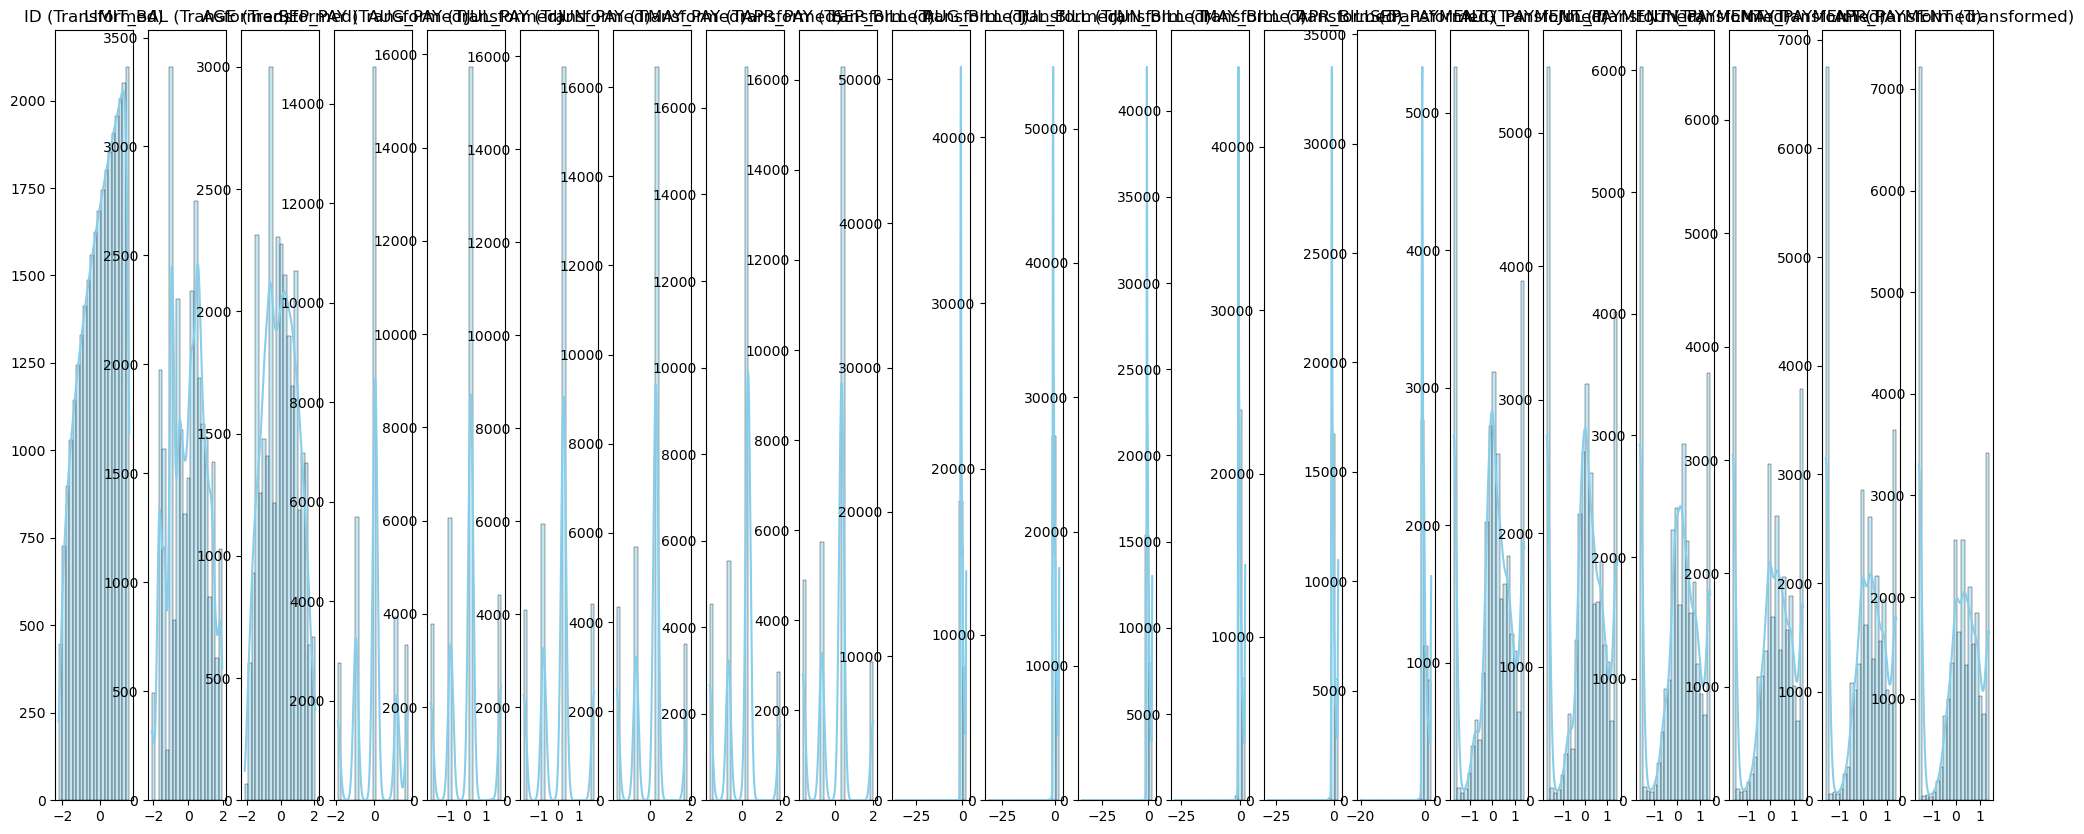

In [489]:
plt.figure(figsize=(25, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')


## Plot each column individually

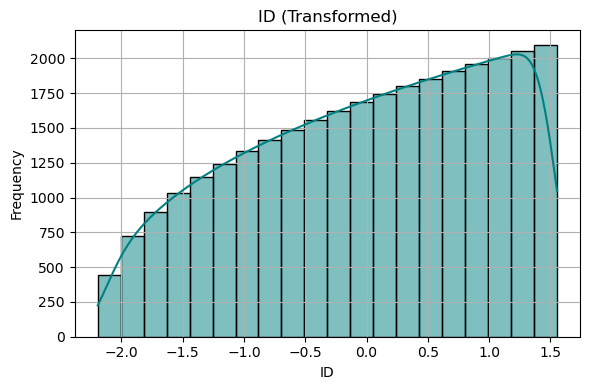

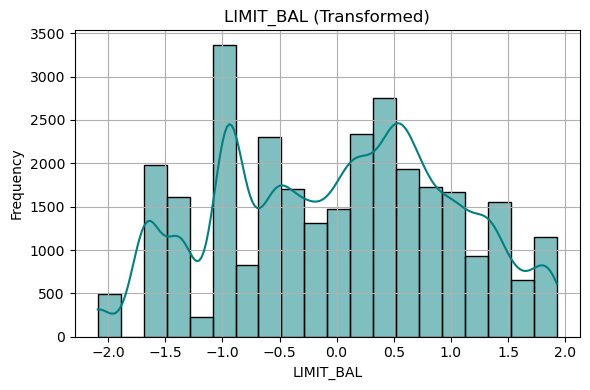

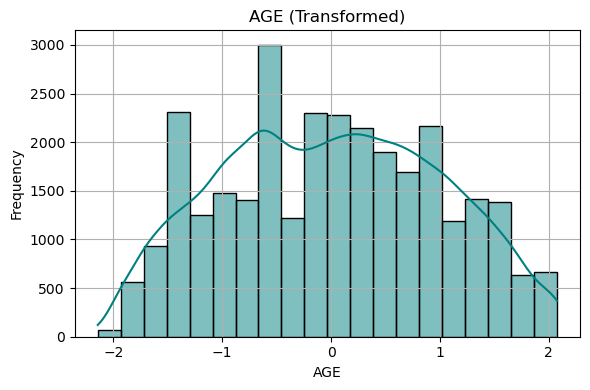

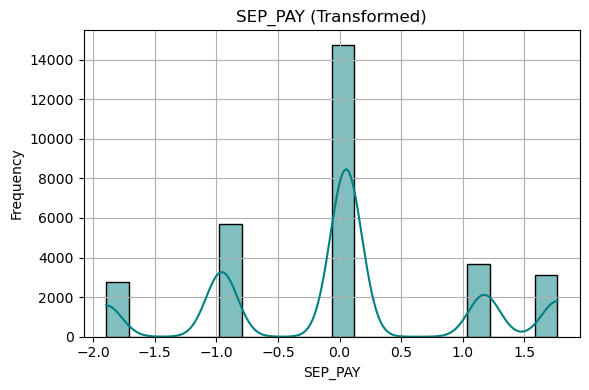

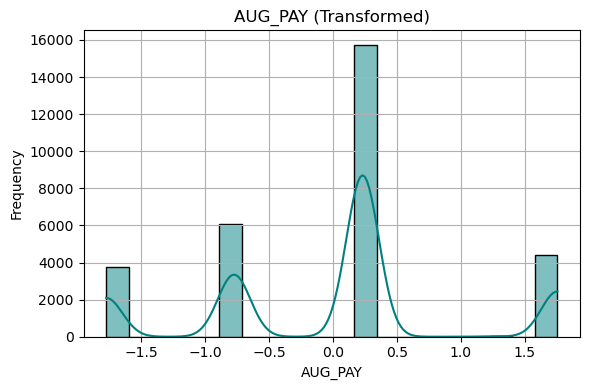

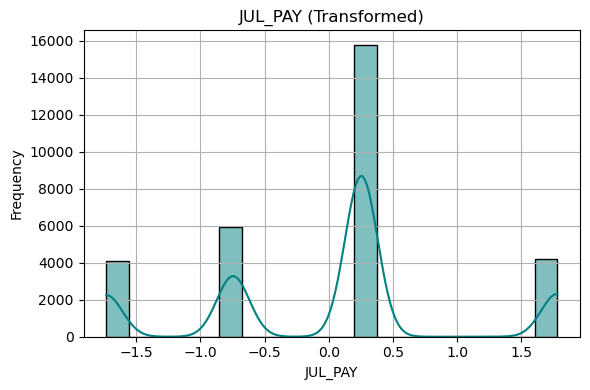

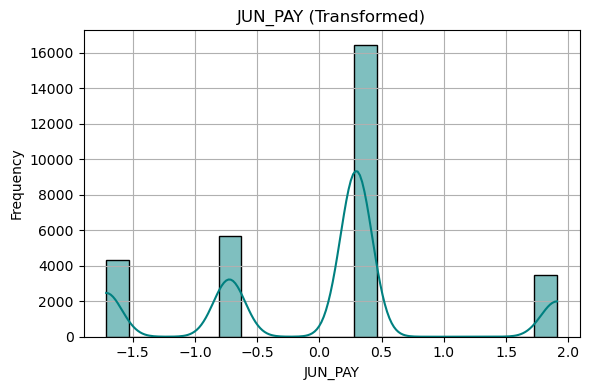

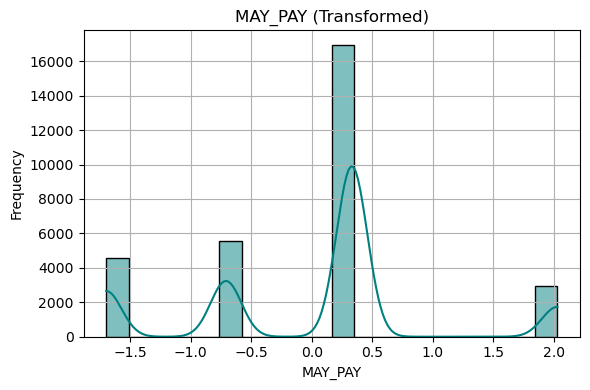

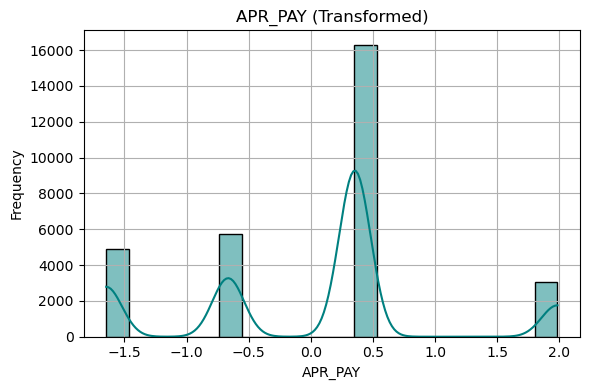

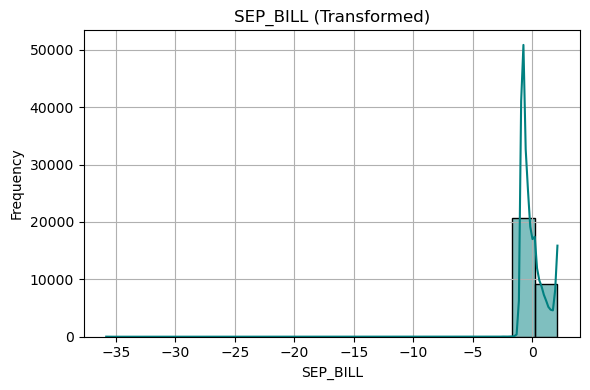

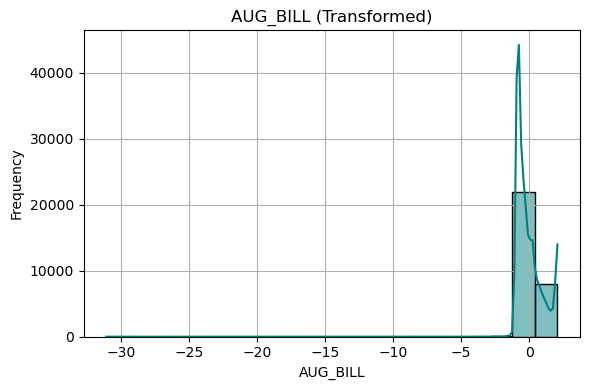

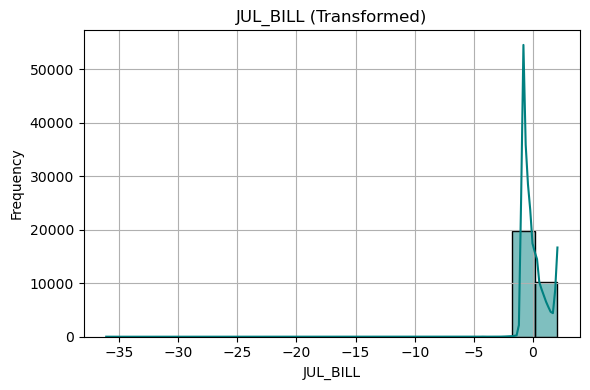

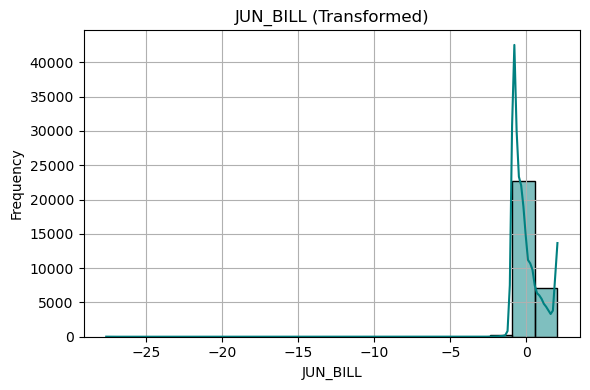

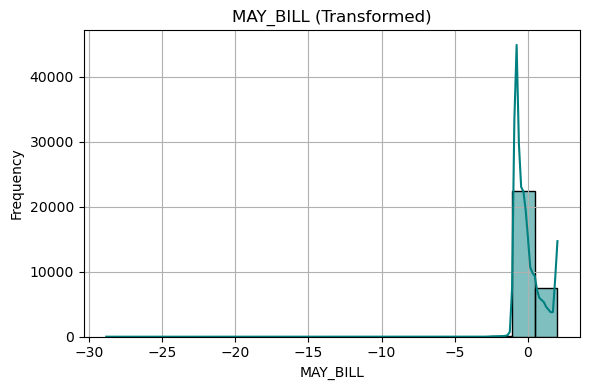

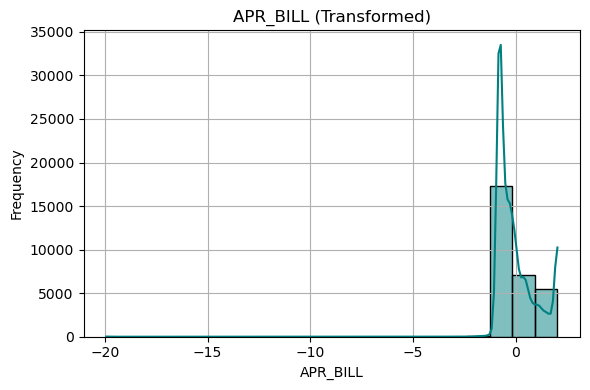

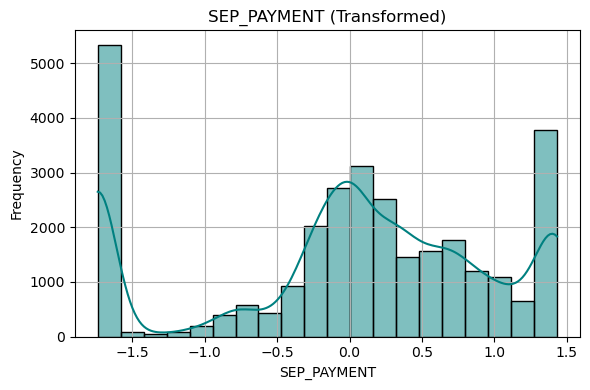

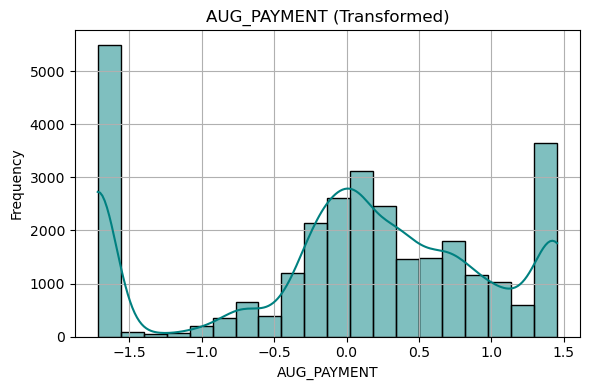

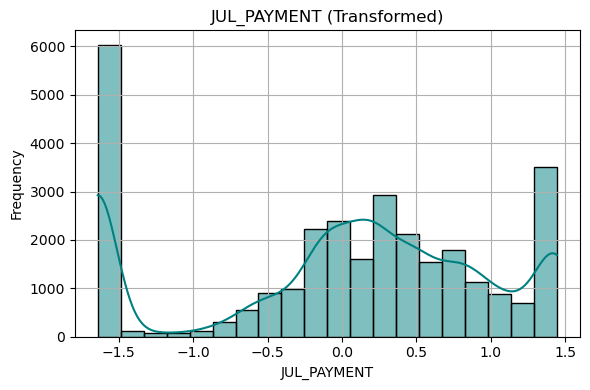

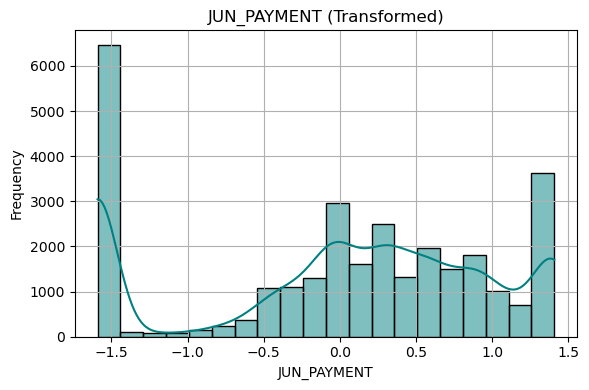

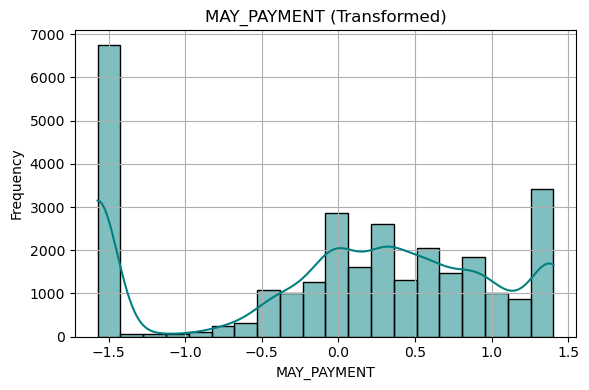

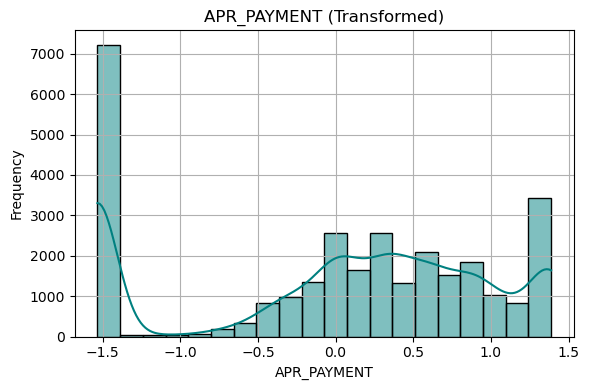

In [490]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Encoding target variable using Label encoder

In [492]:
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE   AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED  24.0      1.5      1.5   
1          2   120000.0   F           UG   SINGLE  26.0     -1.0      1.5   
2          3    90000.0   F           UG   SINGLE  34.0      0.0      0.0   
3          4    50000.0   F           UG  MARRIED  37.0      0.0      0.0   
4          5    50000.0   M           UG  MARRIED  57.0     -1.0      0.0   
...      ...        ...  ..          ...      ...   ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED  39.0      0.0      0.0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE  43.0     -1.0     -1.0   
29997  29998    30000.0   M           UG   SINGLE  37.0      1.5      1.5   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED  41.0      1.0     -1.0   
29999  30000    50000.0   M           UG  MARRIED  46.0      0.0      0.0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0         -1.0     -1.0  ...       0.0       0.0       0.0          0.0   
1          0.0      0.0  ...    3272.0    3455.0    3261.0          0.0   
2          0.0      0.0  ...   14331.0   14948.0   15549.0       1518.0   
3          0.0      0.0  ...   28314.0   28959.0   29547.0       2000.0   
4         -1.0      0.0  ...   20940.0   19146.0   19131.0       2000.0   
...        ...      ...  ...       ...       ...       ...          ...   
29995      0.0      0.0  ...   88004.0   31237.0   15980.0       8500.0   
29996     -1.0     -1.0  ...    8979.0    5190.0       0.0       1837.0   
29997      1.5     -1.0  ...   20878.0   20582.0   19357.0          0.0   
29998      0.0      0.0  ...   52774.0   11855.0   48944.0      11015.0   
29999      0.0      0.0  ...   36535.0   32428.0   15313.0       2078.0   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0            689.0          0.0          0.0          0.0          0.0     YES  
1           1000.0       1000.0       1000.0          0.0       2000.0     YES  
2           1500.0       1000.0       1000.0       1000.0       5000.0      NO  
3           2019.0       1200.0       1100.0       1069.0       1000.0      NO  
4          11250.5      10000.0       9000.0        689.0        679.0      NO  
...            ...          ...          ...          ...          ...     ...  
29995      11250.5       5003.0       3047.0       5000.0       1000.0      NO  
29996       3526.0       8998.0        129.0          0.0          0.0      NO  
29997          0.0      10677.5       4200.0       2000.0       3100.0     YES  
29998       3409.0       1178.0       1926.0       9700.0       1804.0     YES  
29999       1800.0       1430.0       1000.0       1000.0       1000.0     YES  

[30000 rows x 25 columns]

In [493]:
le = LabelEncoder()
df['TARGET']= le.fit_transform(df['TARGET'])
df

ID  LIMIT_BAL SEX    EDUCATION MARRIAGE   AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0   F           UG  MARRIED  24.0      1.5      1.5   
1          2   120000.0   F           UG   SINGLE  26.0     -1.0      1.5   
2          3    90000.0   F           UG   SINGLE  34.0      0.0      0.0   
3          4    50000.0   F           UG  MARRIED  37.0      0.0      0.0   
4          5    50000.0   M           UG  MARRIED  57.0     -1.0      0.0   
...      ...        ...  ..          ...      ...   ...      ...      ...   
29995  29996   220000.0   M  HIGH SCHOOL  MARRIED  39.0      0.0      0.0   
29996  29997   150000.0   M  HIGH SCHOOL   SINGLE  43.0     -1.0     -1.0   
29997  29998    30000.0   M           UG   SINGLE  37.0      1.5      1.5   
29998  29999    80000.0   M  HIGH SCHOOL  MARRIED  41.0      1.0     -1.0   
29999  30000    50000.0   M           UG  MARRIED  46.0      0.0      0.0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0         -1.0     -1.0  ...       0.0       0.0       0.0          0.0   
1          0.0      0.0  ...    3272.0    3455.0    3261.0          0.0   
2          0.0      0.0  ...   14331.0   14948.0   15549.0       1518.0   
3          0.0      0.0  ...   28314.0   28959.0   29547.0       2000.0   
4         -1.0      0.0  ...   20940.0   19146.0   19131.0       2000.0   
...        ...      ...  ...       ...       ...       ...          ...   
29995      0.0      0.0  ...   88004.0   31237.0   15980.0       8500.0   
29996     -1.0     -1.0  ...    8979.0    5190.0       0.0       1837.0   
29997      1.5     -1.0  ...   20878.0   20582.0   19357.0          0.0   
29998      0.0      0.0  ...   52774.0   11855.0   48944.0      11015.0   
29999      0.0      0.0  ...   36535.0   32428.0   15313.0       2078.0   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0            689.0          0.0          0.0          0.0          0.0       1  
1           1000.0       1000.0       1000.0          0.0       2000.0       1  
2           1500.0       1000.0       1000.0       1000.0       5000.0       0  
3           2019.0       1200.0       1100.0       1069.0       1000.0       0  
4          11250.5      10000.0       9000.0        689.0        679.0       0  
...            ...          ...          ...          ...          ...     ...  
29995      11250.5       5003.0       3047.0       5000.0       1000.0       0  
29996       3526.0       8998.0        129.0          0.0          0.0       0  
29997          0.0      10677.5       4200.0       2000.0       3100.0       1  
29998       3409.0       1178.0       1926.0       9700.0       1804.0       1  
29999       1800.0       1430.0       1000.0       1000.0       1000.0       1  

[30000 rows x 25 columns]

In [494]:
le = LabelEncoder()
df['SEX']= le.fit_transform(df['SEX'])
df

ID  LIMIT_BAL  SEX    EDUCATION MARRIAGE   AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0    0           UG  MARRIED  24.0      1.5      1.5   
1          2   120000.0    0           UG   SINGLE  26.0     -1.0      1.5   
2          3    90000.0    0           UG   SINGLE  34.0      0.0      0.0   
3          4    50000.0    0           UG  MARRIED  37.0      0.0      0.0   
4          5    50000.0    1           UG  MARRIED  57.0     -1.0      0.0   
...      ...        ...  ...          ...      ...   ...      ...      ...   
29995  29996   220000.0    1  HIGH SCHOOL  MARRIED  39.0      0.0      0.0   
29996  29997   150000.0    1  HIGH SCHOOL   SINGLE  43.0     -1.0     -1.0   
29997  29998    30000.0    1           UG   SINGLE  37.0      1.5      1.5   
29998  29999    80000.0    1  HIGH SCHOOL  MARRIED  41.0      1.0     -1.0   
29999  30000    50000.0    1           UG  MARRIED  46.0      0.0      0.0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0         -1.0     -1.0  ...       0.0       0.0       0.0          0.0   
1          0.0      0.0  ...    3272.0    3455.0    3261.0          0.0   
2          0.0      0.0  ...   14331.0   14948.0   15549.0       1518.0   
3          0.0      0.0  ...   28314.0   28959.0   29547.0       2000.0   
4         -1.0      0.0  ...   20940.0   19146.0   19131.0       2000.0   
...        ...      ...  ...       ...       ...       ...          ...   
29995      0.0      0.0  ...   88004.0   31237.0   15980.0       8500.0   
29996     -1.0     -1.0  ...    8979.0    5190.0       0.0       1837.0   
29997      1.5     -1.0  ...   20878.0   20582.0   19357.0          0.0   
29998      0.0      0.0  ...   52774.0   11855.0   48944.0      11015.0   
29999      0.0      0.0  ...   36535.0   32428.0   15313.0       2078.0   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0            689.0          0.0          0.0          0.0          0.0       1  
1           1000.0       1000.0       1000.0          0.0       2000.0       1  
2           1500.0       1000.0       1000.0       1000.0       5000.0       0  
3           2019.0       1200.0       1100.0       1069.0       1000.0       0  
4          11250.5      10000.0       9000.0        689.0        679.0       0  
...            ...          ...          ...          ...          ...     ...  
29995      11250.5       5003.0       3047.0       5000.0       1000.0       0  
29996       3526.0       8998.0        129.0          0.0          0.0       0  
29997          0.0      10677.5       4200.0       2000.0       3100.0       1  
29998       3409.0       1178.0       1926.0       9700.0       1804.0       1  
29999       1800.0       1430.0       1000.0       1000.0       1000.0       1  

[30000 rows x 25 columns]

In [495]:
df['EDUCATION'].value_counts()

EDUCATION
UG             14030
PG             10585
HIGH SCHOOL     4917
Phd              280
OTHERS           123
MA                51
MBA               14
Name: count, dtype: int64

## Encoding using One hot Encoder from sklearn.preprocessing

In [497]:
ohe = OneHotEncoder(sparse_output = False, drop = None)

In [498]:
encoded = ohe.fit_transform(df[['EDUCATION']])
encodeddf = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(['EDUCATION']))
encodeddf

EDUCATION_HIGH SCHOOL  EDUCATION_MA  EDUCATION_MBA  EDUCATION_OTHERS  \
0                        0.0           0.0            0.0               0.0   
1                        0.0           0.0            0.0               0.0   
2                        0.0           0.0            0.0               0.0   
3                        0.0           0.0            0.0               0.0   
4                        0.0           0.0            0.0               0.0   
...                      ...           ...            ...               ...   
29995                    1.0           0.0            0.0               0.0   
29996                    1.0           0.0            0.0               0.0   
29997                    0.0           0.0            0.0               0.0   
29998                    1.0           0.0            0.0               0.0   
29999                    0.0           0.0            0.0               0.0   

       EDUCATION_PG  EDUCATION_Phd  EDUCATION_UG  
0               0.0            0.0           1.0  
1               0.0            0.0           1.0  
2               0.0            0.0           1.0  
3               0.0            0.0           1.0  
4               0.0            0.0           1.0  
...             ...            ...           ...  
29995           0.0            0.0           0.0  
29996           0.0            0.0           0.0  
29997           0.0            0.0           1.0  
29998           0.0            0.0           0.0  
29999           0.0            0.0           1.0  

[30000 rows x 7 columns]

In [499]:
df_final = pd.concat([df.drop('EDUCATION', axis = 1), encodeddf], axis = 1)
df_final

ID  LIMIT_BAL  SEX MARRIAGE   AGE  SEP_PAY  AUG_PAY  JUL_PAY  \
0          1    20000.0    0  MARRIED  24.0      1.5      1.5     -1.0   
1          2   120000.0    0   SINGLE  26.0     -1.0      1.5      0.0   
2          3    90000.0    0   SINGLE  34.0      0.0      0.0      0.0   
3          4    50000.0    0  MARRIED  37.0      0.0      0.0      0.0   
4          5    50000.0    1  MARRIED  57.0     -1.0      0.0     -1.0   
...      ...        ...  ...      ...   ...      ...      ...      ...   
29995  29996   220000.0    1  MARRIED  39.0      0.0      0.0      0.0   
29996  29997   150000.0    1   SINGLE  43.0     -1.0     -1.0     -1.0   
29997  29998    30000.0    1   SINGLE  37.0      1.5      1.5      1.5   
29998  29999    80000.0    1  MARRIED  41.0      1.0     -1.0      0.0   
29999  30000    50000.0    1  MARRIED  46.0      0.0      0.0      0.0   

       JUN_PAY  MAY_PAY  ...  MAY_PAYMENT  APR_PAYMENT  TARGET  \
0         -1.0     -2.0  ...          0.0          0.0       1   
1          0.0      0.0  ...          0.0       2000.0       1   
2          0.0      0.0  ...       1000.0       5000.0       0   
3          0.0      0.0  ...       1069.0       1000.0       0   
4          0.0      0.0  ...        689.0        679.0       0   
...        ...      ...  ...          ...          ...     ...   
29995      0.0      0.0  ...       5000.0       1000.0       0   
29996     -1.0      0.0  ...          0.0          0.0       0   
29997     -1.0      0.0  ...       2000.0       3100.0       1   
29998      0.0      0.0  ...       9700.0       1804.0       1   
29999      0.0      0.0  ...       1000.0       1000.0       1   

       EDUCATION_HIGH SCHOOL  EDUCATION_MA  EDUCATION_MBA  EDUCATION_OTHERS  \
0                        0.0           0.0            0.0               0.0   
1                        0.0           0.0            0.0               0.0   
2                        0.0           0.0            0.0               0.0   
3                        0.0           0.0            0.0               0.0   
4                        0.0           0.0            0.0               0.0   
...                      ...           ...            ...               ...   
29995                    1.0           0.0            0.0               0.0   
29996                    1.0           0.0            0.0               0.0   
29997                    0.0           0.0            0.0               0.0   
29998                    1.0           0.0            0.0               0.0   
29999                    0.0           0.0            0.0               0.0   

       EDUCATION_PG  EDUCATION_Phd  EDUCATION_UG  
0               0.0            0.0           1.0  
1               0.0            0.0           1.0  
2               0.0            0.0           1.0  
3               0.0            0.0           1.0  
4               0.0            0.0           1.0  
...             ...            ...           ...  
29995           0.0            0.0           0.0  
29996           0.0            0.0           0.0  
29997           0.0            0.0           1.0  
29998           0.0            0.0           0.0  
29999           0.0            0.0           1.0  

[30000 rows x 31 columns]

In [500]:
df['MARRIAGE'].value_counts()

MARRIAGE
SINGLE     15964
MARRIED    13659
OTHERS       323
0             54
Name: count, dtype: int64

In [501]:
df.replace({'MARRIAGE' : {1:'MARRIED', 2:'SINGLE', 3:'OTHERS', 0:'SINGLE'}}, inplace = True)
df

ID  LIMIT_BAL  SEX    EDUCATION MARRIAGE   AGE  SEP_PAY  AUG_PAY  \
0          1    20000.0    0           UG  MARRIED  24.0      1.5      1.5   
1          2   120000.0    0           UG   SINGLE  26.0     -1.0      1.5   
2          3    90000.0    0           UG   SINGLE  34.0      0.0      0.0   
3          4    50000.0    0           UG  MARRIED  37.0      0.0      0.0   
4          5    50000.0    1           UG  MARRIED  57.0     -1.0      0.0   
...      ...        ...  ...          ...      ...   ...      ...      ...   
29995  29996   220000.0    1  HIGH SCHOOL  MARRIED  39.0      0.0      0.0   
29996  29997   150000.0    1  HIGH SCHOOL   SINGLE  43.0     -1.0     -1.0   
29997  29998    30000.0    1           UG   SINGLE  37.0      1.5      1.5   
29998  29999    80000.0    1  HIGH SCHOOL  MARRIED  41.0      1.0     -1.0   
29999  30000    50000.0    1           UG  MARRIED  46.0      0.0      0.0   

       JUL_PAY  JUN_PAY  ...  JUN_BILL  MAY_BILL  APR_BILL  SEP_PAYMENT  \
0         -1.0     -1.0  ...       0.0       0.0       0.0          0.0   
1          0.0      0.0  ...    3272.0    3455.0    3261.0          0.0   
2          0.0      0.0  ...   14331.0   14948.0   15549.0       1518.0   
3          0.0      0.0  ...   28314.0   28959.0   29547.0       2000.0   
4         -1.0      0.0  ...   20940.0   19146.0   19131.0       2000.0   
...        ...      ...  ...       ...       ...       ...          ...   
29995      0.0      0.0  ...   88004.0   31237.0   15980.0       8500.0   
29996     -1.0     -1.0  ...    8979.0    5190.0       0.0       1837.0   
29997      1.5     -1.0  ...   20878.0   20582.0   19357.0          0.0   
29998      0.0      0.0  ...   52774.0   11855.0   48944.0      11015.0   
29999      0.0      0.0  ...   36535.0   32428.0   15313.0       2078.0   

       AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  TARGET  
0            689.0          0.0          0.0          0.0          0.0       1  
1           1000.0       1000.0       1000.0          0.0       2000.0       1  
2           1500.0       1000.0       1000.0       1000.0       5000.0       0  
3           2019.0       1200.0       1100.0       1069.0       1000.0       0  
4          11250.5      10000.0       9000.0        689.0        679.0       0  
...            ...          ...          ...          ...          ...     ...  
29995      11250.5       5003.0       3047.0       5000.0       1000.0       0  
29996       3526.0       8998.0        129.0          0.0          0.0       0  
29997          0.0      10677.5       4200.0       2000.0       3100.0       1  
29998       3409.0       1178.0       1926.0       9700.0       1804.0       1  
29999       1800.0       1430.0       1000.0       1000.0       1000.0       1  

[30000 rows x 25 columns]

In [502]:
df['MARRIAGE'].value_counts()

MARRIAGE
SINGLE     16018
MARRIED    13659
OTHERS       323
Name: count, dtype: int64

In [503]:
mar = ohe.fit_transform(df[['MARRIAGE']])
mar_df = pd.DataFrame(mar, columns = ohe.get_feature_names_out(['MARRIAGE']))
mar_df

MARRIAGE_MARRIED  MARRIAGE_OTHERS  MARRIAGE_SINGLE
0                   1.0              0.0              0.0
1                   0.0              0.0              1.0
2                   0.0              0.0              1.0
3                   1.0              0.0              0.0
4                   1.0              0.0              0.0
...                 ...              ...              ...
29995               1.0              0.0              0.0
29996               0.0              0.0              1.0
29997               0.0              0.0              1.0
29998               1.0              0.0              0.0
29999               1.0              0.0              0.0

[30000 rows x 3 columns]

In [504]:
df_final1 = pd.concat([df_final.drop('MARRIAGE', axis = 1), mar_df], axis = 1)
df_final1

ID  LIMIT_BAL  SEX   AGE  SEP_PAY  AUG_PAY  JUL_PAY  JUN_PAY  \
0          1    20000.0    0  24.0      1.5      1.5     -1.0     -1.0   
1          2   120000.0    0  26.0     -1.0      1.5      0.0      0.0   
2          3    90000.0    0  34.0      0.0      0.0      0.0      0.0   
3          4    50000.0    0  37.0      0.0      0.0      0.0      0.0   
4          5    50000.0    1  57.0     -1.0      0.0     -1.0      0.0   
...      ...        ...  ...   ...      ...      ...      ...      ...   
29995  29996   220000.0    1  39.0      0.0      0.0      0.0      0.0   
29996  29997   150000.0    1  43.0     -1.0     -1.0     -1.0     -1.0   
29997  29998    30000.0    1  37.0      1.5      1.5      1.5     -1.0   
29998  29999    80000.0    1  41.0      1.0     -1.0      0.0      0.0   
29999  30000    50000.0    1  46.0      0.0      0.0      0.0      0.0   

       MAY_PAY  APR_PAY  ...  EDUCATION_HIGH SCHOOL  EDUCATION_MA  \
0         -2.0     -2.0  ...                    0.0           0.0   
1          0.0      1.5  ...                    0.0           0.0   
2          0.0      0.0  ...                    0.0           0.0   
3          0.0      0.0  ...                    0.0           0.0   
4          0.0      0.0  ...                    0.0           0.0   
...        ...      ...  ...                    ...           ...   
29995      0.0      0.0  ...                    1.0           0.0   
29996      0.0      0.0  ...                    1.0           0.0   
29997      0.0      0.0  ...                    0.0           0.0   
29998      0.0     -1.0  ...                    1.0           0.0   
29999      0.0      0.0  ...                    0.0           0.0   

       EDUCATION_MBA  EDUCATION_OTHERS  EDUCATION_PG  EDUCATION_Phd  \
0                0.0               0.0           0.0            0.0   
1                0.0               0.0           0.0            0.0   
2                0.0               0.0           0.0            0.0   
3                0.0               0.0           0.0            0.0   
4                0.0               0.0           0.0            0.0   
...              ...               ...           ...            ...   
29995            0.0               0.0           0.0            0.0   
29996            0.0               0.0           0.0            0.0   
29997            0.0               0.0           0.0            0.0   
29998            0.0               0.0           0.0            0.0   
29999            0.0               0.0           0.0            0.0   

       EDUCATION_UG  MARRIAGE_MARRIED  MARRIAGE_OTHERS  MARRIAGE_SINGLE  
0               1.0               1.0              0.0              0.0  
1               1.0               0.0              0.0              1.0  
2               1.0               0.0              0.0              1.0  
3               1.0               1.0              0.0              0.0  
4               1.0               1.0              0.0              0.0  
...             ...               ...              ...              ...  
29995           0.0               1.0              0.0              0.0  
29996           0.0               0.0              0.0              1.0  
29997           1.0               0.0              0.0              1.0  
29998           0.0               1.0              0.0              0.0  
29999           1.0               1.0              0.0              0.0  

[30000 rows x 33 columns]

In [505]:
print('Length of Encoded clean data frame', len(df_final1))

Length of Encoded clean data frame 30000


## SMOTE technique 
- Over Sampling Technique - Increase the row size
- Under Sampling Technique - Decrease the row size
- Have to be done before Feature selection

In [508]:
smote = SMOTE()

In [509]:
x_smote, y_smote = smote.fit_resample(df_final1[(i for i in list(df_final1.describe(include='all').columns) if i != 'TARGET')], df_final1['TARGET'])

In [510]:
print('Length of Y SMOTE', len(y_smote))

Length of Y SMOTE 46728


In [511]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df_final1.describe(include='all').columns) if i != 'TARGET')) 

In [512]:
balanced_df

ID      LIMIT_BAL  SEX        AGE   SEP_PAY   AUG_PAY   JUL_PAY  \
0          1   20000.000000    0  24.000000  1.500000  1.500000 -1.000000   
1          2  120000.000000    0  26.000000 -1.000000  1.500000  0.000000   
2          3   90000.000000    0  34.000000  0.000000  0.000000  0.000000   
3          4   50000.000000    0  37.000000  0.000000  0.000000  0.000000   
4          5   50000.000000    1  57.000000 -1.000000  0.000000 -1.000000   
...      ...            ...  ...        ...       ...       ...       ...   
46723  10786   40000.000000    0  31.161439  1.500000  1.500000  1.500000   
46724   9957  421289.944856    0  32.871006 -1.613017 -1.871006 -1.871006   
46725  14580  200000.000000    1  47.334609  1.500000  1.500000  1.500000   
46726  12726  150000.000000    0  31.369567 -1.000000 -1.000000  0.900814   
46727  16830   20000.000000    1  39.969367  1.103528  1.189415  1.189415   

        JUN_PAY   MAY_PAY   APR_PAY  ...  EDUCATION_HIGH SCHOOL  EDUCATION_MA  \
0     -1.000000 -2.000000 -2.000000  ...               0.000000           0.0   
1      0.000000  0.000000  1.500000  ...               0.000000           0.0   
2      0.000000  0.000000  0.000000  ...               0.000000           0.0   
3      0.000000  0.000000  0.000000  ...               0.000000           0.0   
4      0.000000  0.000000  0.000000  ...               0.000000           0.0   
...         ...       ...       ...  ...                    ...           ...   
46723  0.510090  0.000000  0.000000  ...               0.000000           0.0   
46724 -2.000000 -2.000000 -2.000000  ...               0.000000           0.0   
46725  1.500000  0.235182  0.235182  ...               0.000000           0.0   
46726 -1.171196 -1.171196 -1.000000  ...               0.000000           0.0   
46727  1.189415  1.189415  1.189415  ...               0.207057           0.0   

       EDUCATION_MBA  EDUCATION_OTHERS  EDUCATION_PG  EDUCATION_Phd  \
0                0.0               0.0      0.000000            0.0   
1                0.0               0.0      0.000000            0.0   
2                0.0               0.0      0.000000            0.0   
3                0.0               0.0      0.000000            0.0   
4                0.0               0.0      0.000000            0.0   
...              ...               ...           ...            ...   
46723            0.0               0.0      0.000000            0.0   
46724            0.0               0.0      0.871006            0.0   
46725            0.0               0.0      1.000000            0.0   
46726            0.0               0.0      0.171196            0.0   
46727            0.0               0.0      0.000000            0.0   

       EDUCATION_UG  MARRIAGE_MARRIED  MARRIAGE_OTHERS  MARRIAGE_SINGLE  
0          1.000000          1.000000         0.000000         0.000000  
1          1.000000          0.000000         0.000000         1.000000  
2          1.000000          0.000000         0.000000         1.000000  
3          1.000000          1.000000         0.000000         0.000000  
4          1.000000          1.000000         0.000000         0.000000  
...             ...               ...              ...              ...  
46723      1.000000          0.340060         0.000000         0.659940  
46724      0.128994          0.128994         0.000000         0.871006  
46725      0.000000          0.000000         0.843212         0.156788  
46726      0.828804          1.000000         0.000000         0.000000  
46727      0.792943          0.000000         0.207057         0.792943  

[46728 rows x 32 columns]

In [513]:
balanced_df['TARGET'] = y_smote

In [514]:
balanced_df.shape

(46728, 33)

In [515]:
balanced_df['TARGET'].value_counts()

TARGET
1    23364
0    23364
Name: count, dtype: int64

In [583]:
balanced_df.to_csv('Balanced Creditcard.csv', index = False)

## Feature Selection

In [518]:
skb = SelectKBest(score_func = f_classif, k = 20)

In [519]:
df_final1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY',
       'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL',
       'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'SEP_PAYMENT', 'AUG_PAYMENT',
       'JUL_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT', 'TARGET',
       'EDUCATION_HIGH SCHOOL', 'EDUCATION_MA', 'EDUCATION_MBA',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_Phd', 'EDUCATION_UG',
       'MARRIAGE_MARRIED', 'MARRIAGE_OTHERS', 'MARRIAGE_SINGLE'],
      dtype='object')

In [520]:
y = df_final1['TARGET']
x = df_final1.drop('TARGET', axis =1)

In [521]:
x.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY',
       'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL',
       'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'SEP_PAYMENT', 'AUG_PAYMENT',
       'JUL_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT',
       'EDUCATION_HIGH SCHOOL', 'EDUCATION_MA', 'EDUCATION_MBA',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_Phd', 'EDUCATION_UG',
       'MARRIAGE_MARRIED', 'MARRIAGE_OTHERS', 'MARRIAGE_SINGLE'],
      dtype='object')

In [522]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: TARGET, Length: 30000, dtype: int64

In [523]:
x_new = skb.fit_transform(x, y)

In [524]:
selected_cols = x.columns[skb.get_support()]
selected_cols

Index(['LIMIT_BAL', 'SEX', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY', 'JUN_PAY',
       'MAY_PAY', 'APR_PAY', 'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT',
       'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT', 'EDUCATION_HIGH SCHOOL',
       'EDUCATION_PG', 'EDUCATION_Phd', 'EDUCATION_UG', 'MARRIAGE_MARRIED',
       'MARRIAGE_SINGLE'],
      dtype='object')

In [525]:
feature_scores = pd.DataFrame({ 
    'Feature': x.columns, 
    'Score': skb.scores_ 
}).sort_values(by='Score', ascending=False)
feature_scores

Feature        Score
4                 SEP_PAY  2789.572373
5                 AUG_PAY  1757.838341
6                 JUL_PAY  1364.821085
7                 JUN_PAY  1086.526784
8                 MAY_PAY   922.241412
9                 APR_PAY   754.111831
1               LIMIT_BAL   732.399871
16            SEP_PAYMENT   630.195082
17            AUG_PAYMENT   597.085819
18            JUL_PAYMENT   472.764309
21            APR_PAYMENT   398.873802
19            JUN_PAYMENT   392.997413
20            MAY_PAYMENT   354.560868
26           EDUCATION_PG    79.239624
2                     SEX    47.978854
27          EDUCATION_Phd    40.448333
28           EDUCATION_UG    39.946469
22  EDUCATION_HIGH SCHOOL    31.530007
31        MARRIAGE_SINGLE    30.260374
29       MARRIAGE_MARRIED    26.617647
10               SEP_BILL    25.306959
25       EDUCATION_OTHERS    19.361938
11               AUG_BILL    15.577821
12               JUL_BILL    13.183268
13               JUN_BILL     8.114146
0                      ID     5.840459
3                     AGE     5.620441
14               MAY_BILL     5.444459
24          EDUCATION_MBA     3.978493
30        MARRIAGE_OTHERS     2.862554
15               APR_BILL     2.346899
23           EDUCATION_MA     1.227473

In [526]:
x_selected = x[selected_cols] 
x_selected

LIMIT_BAL  SEX  SEP_PAY  AUG_PAY  JUL_PAY  JUN_PAY  MAY_PAY  APR_PAY  \
0        20000.0    0      1.5      1.5     -1.0     -1.0     -2.0     -2.0   
1       120000.0    0     -1.0      1.5      0.0      0.0      0.0      1.5   
2        90000.0    0      0.0      0.0      0.0      0.0      0.0      0.0   
3        50000.0    0      0.0      0.0      0.0      0.0      0.0      0.0   
4        50000.0    1     -1.0      0.0     -1.0      0.0      0.0      0.0   
...          ...  ...      ...      ...      ...      ...      ...      ...   
29995   220000.0    1      0.0      0.0      0.0      0.0      0.0      0.0   
29996   150000.0    1     -1.0     -1.0     -1.0     -1.0      0.0      0.0   
29997    30000.0    1      1.5      1.5      1.5     -1.0      0.0      0.0   
29998    80000.0    1      1.0     -1.0      0.0      0.0      0.0     -1.0   
29999    50000.0    1      0.0      0.0      0.0      0.0      0.0      0.0   

       SEP_PAYMENT  AUG_PAYMENT  JUL_PAYMENT  JUN_PAYMENT  MAY_PAYMENT  \
0              0.0        689.0          0.0          0.0          0.0   
1              0.0       1000.0       1000.0       1000.0          0.0   
2           1518.0       1500.0       1000.0       1000.0       1000.0   
3           2000.0       2019.0       1200.0       1100.0       1069.0   
4           2000.0      11250.5      10000.0       9000.0        689.0   
...            ...          ...          ...          ...          ...   
29995       8500.0      11250.5       5003.0       3047.0       5000.0   
29996       1837.0       3526.0       8998.0        129.0          0.0   
29997          0.0          0.0      10677.5       4200.0       2000.0   
29998      11015.0       3409.0       1178.0       1926.0       9700.0   
29999       2078.0       1800.0       1430.0       1000.0       1000.0   

       APR_PAYMENT  EDUCATION_HIGH SCHOOL  EDUCATION_PG  EDUCATION_Phd  \
0              0.0                    0.0           0.0            0.0   
1           2000.0                    0.0           0.0            0.0   
2           5000.0                    0.0           0.0            0.0   
3           1000.0                    0.0           0.0            0.0   
4            679.0                    0.0           0.0            0.0   
...            ...                    ...           ...            ...   
29995       1000.0                    1.0           0.0            0.0   
29996          0.0                    1.0           0.0            0.0   
29997       3100.0                    0.0           0.0            0.0   
29998       1804.0                    1.0           0.0            0.0   
29999       1000.0                    0.0           0.0            0.0   

       EDUCATION_UG  MARRIAGE_MARRIED  MARRIAGE_SINGLE  
0               1.0               1.0              0.0  
1               1.0               0.0              1.0  
2               1.0               0.0              1.0  
3               1.0               1.0              0.0  
4               1.0               1.0              0.0  
...             ...               ...              ...  
29995           0.0               1.0              0.0  
29996           0.0               0.0              1.0  
29997           1.0               0.0              1.0  
29998           0.0               1.0              0.0  
29999           1.0               1.0              0.0  

[30000 rows x 20 columns]

In [588]:
x_selected.to_csv('Featured Data.csv', index = False)

## Scaling
- Standard Scaler(0-1)
- Min-Max Scaler 
- Only for X values and not for Y variable in classification

In [529]:
ss = StandardScaler()

In [530]:
x_scaled = ss.fit_transform(x_selected)
x_scaled

array([[-1.14808251, -0.81016074,  1.6744629 , ...,  1.06689977,
         1.09377971, -1.07033443],
       [-0.36690123, -0.81016074, -0.9516787 , ...,  1.06689977,
        -0.91426088,  0.93428743],
       [-0.60125562, -0.81016074,  0.09877794, ...,  1.06689977,
        -0.91426088,  0.93428743],
       ...,
       [-1.06996438,  1.23432296,  1.6744629 , ...,  1.06689977,
        -0.91426088,  0.93428743],
       [-0.67937374,  1.23432296,  1.14923458, ..., -0.93729517,
         1.09377971, -1.07033443],
       [-0.91372813,  1.23432296,  0.09877794, ...,  1.06689977,
         1.09377971, -1.07033443]])

## Training and Testing

In [533]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

In [534]:
print('X_Train shape: ', x_train.shape)
print('X_Test shape: ', x_test.shape)
print('Y_Train shape: ', y_train.shape)
print('Y_Test shape: ', y_test.shape)

X_Train shape:  (24000, 20)
X_Test shape:  (6000, 20)
Y_Train shape:  (24000,)
Y_Test shape:  (6000,)


In [535]:
y.value_counts()       # Imbalanced data

TARGET
0    23364
1     6636
Name: count, dtype: int64

## Machine Learning
- Model Building
### Logistic Regression

In [537]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [538]:
y_pred_lr = lr.predict(x_test)

In [539]:
# Evaluation metrics for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [540]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.8048333333333333


In [541]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.23      0.34      1327

    accuracy                           0.80      6000
   macro avg       0.75      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000



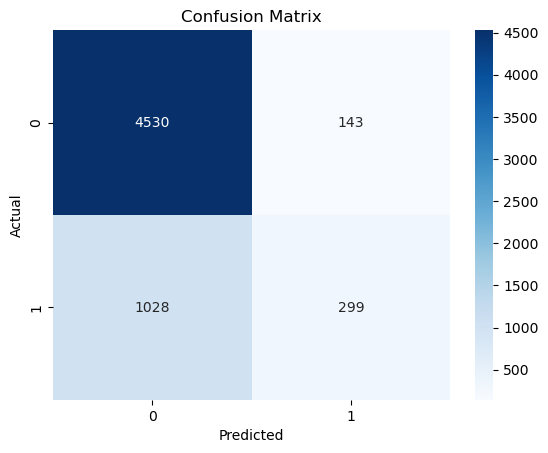

In [542]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_lr) 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

### Gaussian Naive Bayes

In [544]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [545]:
y_pred_nb = gnb.predict(x_test)

In [546]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.6705

In [547]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77      4673
           1       0.35      0.60      0.44      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.64      0.61      6000
weighted avg       0.75      0.67      0.69      6000



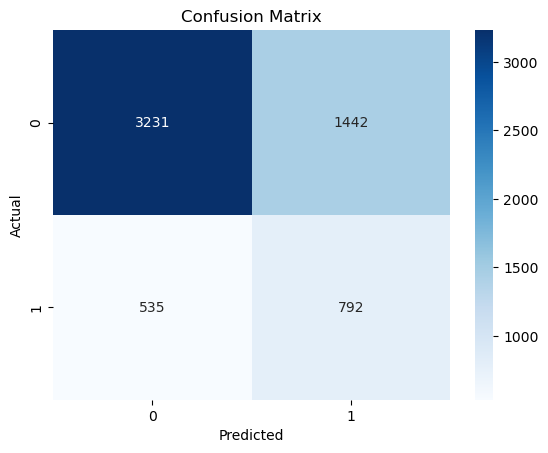

In [548]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_nb) 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

### Decision Tree Classifier

In [550]:
dt = DecisionTreeClassifier()

In [551]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [552]:
y_pred_dt = dt.predict(x_test)

In [553]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.725


In [554]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.38      0.40      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



In [555]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_dt) 

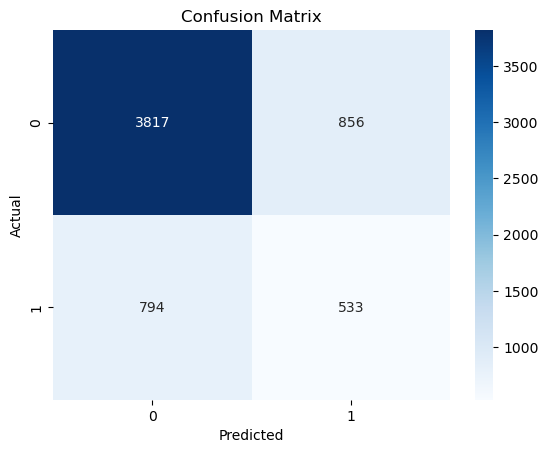

In [556]:
# Plotting using heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

### Support Vector Classifier

In [558]:
svc = SVC()

In [559]:
svc.fit(x_train, y_train)

SVC()

In [560]:
y_pred_svc = svc.predict(x_test)

In [561]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.8145


In [562]:
# Classification Report

print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



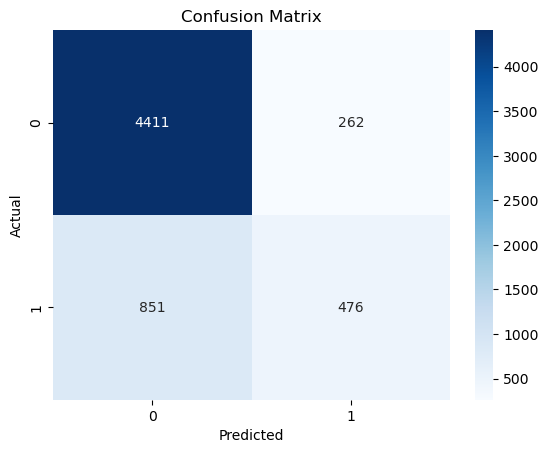

In [563]:
# Confusion Matrix 

conf_matrix = confusion_matrix(y_test, y_pred_svc) 

#Heatmap

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

### Ensemble Learning - RandomForestClassifier

In [565]:
# 21/07/2025
rfc = RandomForestClassifier()

In [566]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [567]:
y_pred_rfc = rfc.predict(x_test)

In [568]:
accuracy = accuracy_score(y_test, y_pred_rfc)
print('Accuracy: ', accuracy)

Accuracy:  0.8133333333333334


In [569]:
print('\n Classification Report: \n', classification_report(y_test, y_pred_rfc))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.37      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



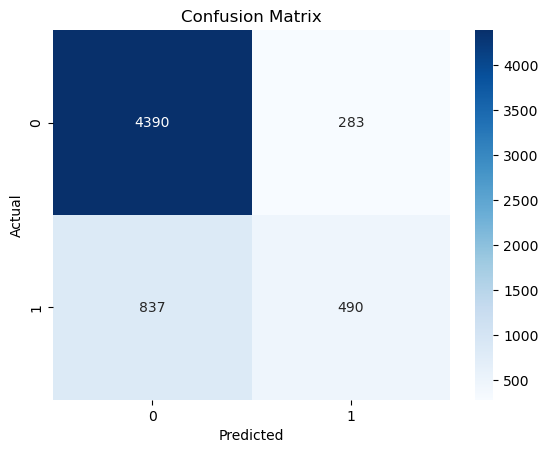

In [570]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()           

### Gradient Boosting Classifier

In [572]:
gbc = GradientBoostingClassifier()

In [573]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [574]:
y_pred_gbc = gbc.predict(x_test)

In [575]:
accuracy = accuracy_score(y_test, y_pred_gbc)
print('Accuracy: ', accuracy)

Accuracy:  0.8176666666666667


In [576]:
print('\n Classification Report: \n', classification_report(y_test, y_pred_gbc))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



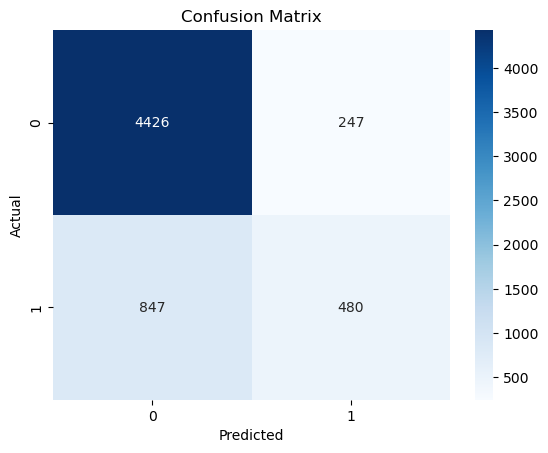

In [577]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()  

## AdaBoost Classifier
### Define models

In [579]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

### Store results

In [581]:
scores = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    scores.append({
        "Model": name,
        "Accuracy": round(accuracy, 2),
        "Precision": round(precision, 2),
        "F1": round(f1, 2),
        "Recall": round(recall, 4)
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(scores)
print(results_df)

                 Model  Accuracy  Precision    F1  Recall
0  Logistic Regression      0.80       0.68  0.34  0.2253
1        Decision Tree      0.72       0.38  0.39  0.3994
2        Random Forest      0.81       0.62  0.46  0.3685
3             AdaBoost      0.82       0.67  0.44  0.3323
4    Gradient Boosting      0.82       0.66  0.47  0.3617


## Creating a Pipeline

In [585]:
pipeline = Pipeline([('Imputer', SimpleImputer(strategy = 'mean')),
                     ('Scaler', StandardScaler()),
                     ('Classifier', RandomForestClassifier(random_state = 42))])

In [586]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Classifier', RandomForestClassifier(random_state=42))])

## Saving the pipeline

In [587]:
joblib.dump(pipeline, 'Credit.joblib')

['Credit.joblib']

In [598]:
loaded_pipeline = joblib.load('Credit.joblib')

In [594]:
df_unseen = pd.read_csv('Unseen Data.csv')
df_unseen

LIMIT_BAL  SEX  SEP_PAY  AUG_PAY  JUL_PAY  JUN_PAY  MAY_PAY  APR_PAY  \
0       20000    0      1.5      1.5     -1.0     -1.0     -2.0     -2.0   
1      120000    0     -1.0      1.5      0.0      0.0      0.0      1.5   
2       90000    0      0.0      0.0      0.0      0.0      0.0      0.0   
3       50000    0      0.0      0.0      0.0      0.0      0.0      0.0   
4       50000    1     -1.0      0.0     -1.0      0.0      0.0      0.0   
5       50000    1      0.0      0.0      0.0      0.0      0.0      0.0   
6      500000    1      0.0      0.0      0.0      0.0      0.0      0.0   
7      100000    0      0.0     -1.0     -1.0      0.0      0.0     -1.0   
8      140000    0      0.0      0.0      1.5      0.0      0.0      0.0   
9       20000    1     -2.0     -2.0     -2.0     -2.0     -1.0     -1.0   
10     200000    0      0.0      0.0      1.5      0.0      0.0     -1.0   
11     260000    0     -1.0     -1.0     -1.0     -1.0     -1.0      1.5   
12     525000    0     -1.0      0.0     -1.0     -1.0     -1.0     -1.0   
13      70000    1      1.0      1.5      1.5      0.0      0.0      1.5   
14     250000    1      0.0      0.0      0.0      0.0      0.0      0.0   
15      50000    0      1.0      1.5      0.0      0.0      0.0      0.0   
16      20000    1      0.0      0.0      1.5      1.5      1.5      1.5   
17     320000    1      0.0      0.0      0.0     -1.0     -1.0     -1.0   
18     360000    0      1.0     -2.0     -2.0     -2.0     -2.0     -2.0   
19     180000    0      1.0     -2.0     -2.0     -2.0     -2.0     -2.0   
20     130000    0      0.0      0.0      0.0      0.0      0.0     -1.0   
21     120000    0     -1.0     -1.0     -1.0     -1.0     -1.0     -1.0   

    SEP_PAYMENT  AUG_PAYMENT  ...  JUN_PAYMENT  MAY_PAYMENT  APR_PAYMENT  \
0             0        689.0  ...        0.000            0        0.000   
1             0       1000.0  ...     1000.000            0     2000.000   
2          1518       1500.0  ...     1000.000         1000     5000.000   
3          2000       2019.0  ...     1100.000         1069     1000.000   
4          2000      11250.5  ...     9000.000          689      679.000   
5          2500       1815.0  ...     1000.000         1000      800.000   
6         11015      11250.5  ...     9589.125         9700     9823.375   
7           380        601.0  ...      581.000         1687     1542.000   
8          3329          0.0  ...     1000.000         1000     1000.000   
9             0          0.0  ...     9589.125         1122        0.000   
10         2306         12.0  ...      300.000         3738       66.000   
11        11015       9966.0  ...     9589.125            0     3640.000   
12         1000       6500.0  ...     6500.000         2870        0.000   
13         3200          0.0  ...     3000.000         1500        0.000   
14         3000       3000.0  ...     3000.000         3000     3000.000   
15            0       1500.0  ...     1200.000         1300     1100.000   
16         3200          0.0  ...        0.000         1650        0.000   
17        10358      10000.0  ...     9589.125         9700     9823.375   
18            0          0.0  ...        0.000            0        0.000   
19            0          0.0  ...        0.000            0        0.000   
20         3000       1537.0  ...     2000.000          930     9823.375   
21          316        316.0  ...      632.000          316        0.000   

    EDUCATION_HIGH SCHOOL  EDUCATION_PG  EDUCATION_Phd  EDUCATION_UG  \
0                       0             0              0             1   
1                       0             0              0             1   
2                       0             0              0             1   
3                       0             0              0             1   
4                       0             0              0             1   
5                       0             1              0             0   
6 

In [595]:
x_unseen = df_unseen.drop('TARGET', axis = 1)

In [596]:
y_unseen = df_unseen['TARGET']

In [599]:
y_pred_unseen = loaded_pipeline.predict(x_unseen)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [600]:
# Accuracy
accuracy = accuracy_score(y_unseen, y_pred_unseen)
accuracy

0.7727272727272727

In [601]:
df_unseen['Predicted'] = y_pred_unseen

In [602]:
df_unseen[['TARGET', 'Predicted']].head(10)

TARGET  Predicted
0       1          0
1       1          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0